<a href="https://colab.research.google.com/github/LoreSoHe/Desafio1/blob/main/%5BDefinitivo%5DProyecto_Aplicado_An%C3%A1lisis_y_visualizaci%C3%B3n_de_datos_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breve análisis de datos de la educación en Colombia
# en la segunda década del siglo XXI.
### *Proyecto Aplicado - Análisis y visualización de datos con Python*
### **Autoras: Lina María Rodriguez Ciendua y  Lorena Soriano Hernandez**


# 1. Entendimiento del negocio.
 
 
En los últimos dos años la humanidad ha buscado reinventar las formas de hacer las tareas cotidianas. En tiempos tan dramáticos no puede aplazarse la educación de la primera infancia y adolescencia y es un deber mantenerla. En este trabajo nos centramos en la sociedad colombiana y presentamos datos estadísticos de los niveles preescolar, básica y media relacionada con indicadores sectoriales por Municipio sin atípicos, desde el 2011 hasta 2019 datos oficiales definitivos y datos 2020 preliminares sin incluir auditorías.
 
#Objetivo General
Estudiar cambios significativos de los factores determinantes en la educación de Colombia
 
#Objetivos Específicos
1. Evaluar las relaciones entre la tasa de reprobación,repitencia y deserción en el grado escolar medio (10 y 11) en el departamento de Cundinamarca para poder mitigar el impacto futuro de estos factores en los años posteriores a la pandemia.
2. Estimar el estado de la reprobación en los años posteriores a la pandemia para dar un panorama sobre la  educación en la etapa media a la que nos vemos enfrentados en los próximos años.
3.  Estimar el estado de la educación en 2020 con relación a una década atrás.
 
#Conceptualización y Justificación de las metas del proyecto.
Se observa que desde finales del siglo XX Colombia ha colocado como población objetivo a la primera infancia y adolescencia en sus planes de desarrollo, en los presupuestos de la nación y en las políticas públicas. No obstante, también se ven desalentadores resultados en pruebas Saber y más persistente es la brecha que existe para el ingreso a la educación superior.
Una posible hipótesis es: durante la pandemia el nivel de reprobación, repitencia y deserción aumenta a razón de las condiciones atípicas, estos factores aumentan también dadas sus relaciones. Entonces, es preciso indagar sobre datos de la educación en esta franja de edades para encontrar posibles factores a tener en cuenta para tener un foco en los próximos planes de desarrollo dirigidos a esta población.







## 1.1 Descripción de la planeación del proyecto.
Comparar los estados de la educación en años inmediatamente anteriores a la pandemia y luego durante el primer año de pandemia, es decir, tomar las cifras de 2018 a 2019 y compararlos con los de 2020 en una determinada población.
 
0. Luego de una primera exploración de los datos, hacer una delimitación de la población.
 
1. Comparar los datos de los años 2020 y 2011.
 
2. Encontrar relaciones para la deserción estudiantil, (H_0 No correlación significativa, H_1 Correlación Significativa (Media)), para estimar si la educación estaba preparada para soportar el cambio.
 
3. Sedes conectas a internet correlacionada con Infraestructura aprobación, repitencia y deserción de los estudiantes.
 
4. Analizar la reprobación por zonas del país.
 
5. Encontrar posibles factores que influencian la mortalidad académica (reprobación) (Definimos mortalidad académica como pérdida de año escolar esto sería igual que los datos de repitencia y también a los datos que corresponden a la deserción).
 
6. Determinar variables relacionadas con la deserción estudiantil.









# 2. Entendimiento de los datos


##2.2 Lectura del archivo de datos
---
> **IMPORTANTE:** 

  1. Por favor descargue el archivo con el conjunto de datos desde el siguiente enlace: **[MEN_ESTADISTICAS_EN_EDUCACION_EN_PREESCOLAR__B_SICA_Y_MEDIA_POR_MUNICIPIO.csv](https://drive.google.com/file/d/1dDitJPahnJFGWhi2M-lRDG45LxcWnUYj/view?usp=sharing)**. 
  
  2. En el enlace, haga clic secundario y seleccione la opción **"Guardar como..."**.

  3. Cargue este archivo en su sistema de archivos de **Google Colaboratory**. Para hacer esto:
    
    * Haga clic donde aparece el icono del directorio en la parte izquierda de la ventana en *Google Colaboratory* (resaltado en azul en la siguiente imagen con el número 1).
    * Después, haga clic en el icono **"Subir"** (resaltado en azul en la siguiente imagen con el número 2).
    * Seleccione el archivo **`MEN_ESTADISTICAS_EN_EDUCACION_EN_PREESCOLAR__B_SICA_Y_MEDIA_POR_MUNICIPIO.csv`** que previamente descargó y haga clic en **"Aceptar"**.

In [ ]:
# GeoPandas.
!pip install geopandas

# Dependencias necesarias.
!pip install -U rtree mapclassify fiona pyproj
!sudo apt install libspatialindex-dev

#Importando librería de utilidad en el desarrollo del trabajo
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import geopandas as gpd
import shapely
from shapely.geometry import * 
%matplotlib inline
plt.rcParams['figure.dpi'] = 110  
import plotly
import plotly.graph_objs as go 
import plotly.express as px

import json

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
### EJECUTAR ESTA CELDA SIN MODIFICARLA. SI FALLA, DEBE SEGUIR EL PROCEDIMIENTO DESCRITO ANTES.
df = pd.read_csv('MEN_ESTADISTICAS_EN_EDUCACION_EN_PREESCOLAR__B_SICA_Y_MEDIA_POR_MUNICIPIO.csv')

Este dataframe original contiene las siguientes columnas:

| Variable | Definición	| Valores | 
| --- | --- | --- |
| AÑO   | Año en el que fueron tomado los datos | 	|
| CÓDIGO_MUNICIPIO| De acuendo a la Codificación de Municipios por Departamento| Datos segun http://www.saludcapital.gov.co › Codificaciones|	De 2011 a 2020
| MUNICIPIO 	| Nombre del municipio asignado al código 	| 
| CÓDIGO_DEPARTAMENTO |	De acuendo a la Codificación de Departamentos |Datos segun http://www.saludcapital.gov.co › Codificaciones|
|DEPARTAMENTO | Nombre del departamento asignado al código  |
| CÓDIGO_ETC | Código DANE de la Entidad Territorial Certificada (ETC)	 |  |
| ETC |	Nombre de la ETC | |	
|POBLACIÓN_5_16|Población en edad teórica de estudiar (5 a 16 años) según proyecciones de población del DANE|
|TASA_MATRICULACIÓN_5_16 (%)|Proporción de la población entre 5 y 16 años que se encuentra asistiendo al sistema educativo.| Cuando las proyecciones de población del DANE no capturan adecuadamente los flujos migratorios internos, puede alcanzar valores mayores al 100%.|
|COBERTURA_NETA (%)|Es la relación entre el número de estudiantes matriculados en transición, primaria, secundaria y media que tienen la edad teórica (5 a 16 años) y el total de la población correspondiente a esa misma edad.| Cuando las proyecciones de población del DANE no capturan adecuadamente los flujos migratorios internos, puede alcanzar valores mayores al 100%|
|COBERTURA_NETA_TRANSICIÓN (%)|Es la relación entre el número de estudiantes matriculados en transición que tienen la edad teórica para cursar este nivel (5 años) y el total de la población correspondiente a esa misma edad. |Cuando las proyecciones de población del DANE no capturan adecuadamente los flujos migratorios internos, puede alcanzar valores mayores al 100%.|
|COBERTURA_NETA_PRIMARIA (%)|Es la relación entre el número de estudiantes matriculados en primaria que tienen la edad teórica para cursar este nivel (6 a 10 años) y el total de la población correspondiente a esa misma edad.| Cuando las proyecciones de población del DANE no capturan adecuadamente los flujos migratorios internos, puede alcanzar valores mayores al 100%|
|COBERTURA_NETA_SECUNDARIA (%)|Es la relación entre el número de estudiantes matriculados en secundaria que tienen la edad teórica para cursar este nivel (11 a 14 años) y el total de la población correspondiente a esa misma edad. |Cuando las proyecciones de población del DANE no capturan adecuadamente los flujos migratorios internos, puede alcanzar valores mayores al 100%.|
|COBERTURA_NETA_MEDIA (%)|Es la relación entre el número de estudiantes matriculados en media que tienen la edad teórica para cursar este nivel (15 a 16 años) y el total de la población correspondiente a esa misma edad.| Cuando las proyecciones de población del DANE no capturan adecuadamente los flujos migratorios internos, puede alcanzar valores mayores al 100%.|
|COBERTURA_BRUTA (%)|Es la relación entre el número de estudiantes matriculados en transición, primaria, secundaria y media respecto a la población en edad teórica para cursar estos niveles (5 a 16 años).| En algunos casos la demanda social es mayor a la población en edad teórica para cursar educación preescolar, básica y media (5 a 16 años), explicada por estudiantes en extraedad, por lo que el indicador toma valores superiores al 100%.|
|COBERTURA_BRUTA_TRANSICIÓN (%)|Es la relación entre el número de estudiantes matriculados en transición respecto a la población en edad teórica para cursar este nivel (5 años).| En algunos casos la demanda social es mayor a la población en edad teórica para cursar este nivel (5 años), explicada por estudiantes en extraedad, por lo que el indicador toma valores superiores al 100%.|
|COBERTURA_BRUTA_PRIMARIA (%)|Es la relación entre el número de estudiantes matriculados en primaria respecto a la población en edad teórica para cursar este nivel (6 a 10 años). |En algunos casos la demanda social es mayor a la población en edad teórica para cursar este nivel (6 a 10 años), explicada por estudiantes en extraedad, por lo que el indicador toma valores superiores al 100%.|  
|COBERTURA_BRUTA_SECUNDARIA (%)|Es la relación entre el número de estudiantes matriculados en secundaria respecto a la población en edad teórica para cursar este nivel (11 a 14 años). |En algunos casos la demanda social es mayor a la población en edad teórica para cursar este nivel (11 a 14 años), explicada por estudiantes en extraedad, por lo que el indicador toma valores superiores al 100%.|
|COBERTURA_BRUTA_MEDIA (%)|Es la relación entre el número de estudiantes matriculados en media respecto a la población en edad teórica para cursar este nivel (15 a 16 años). |En algunos casos la demanda social es mayor a la población en edad teórica para cursar este nivel (15 a 16 años), explicada por estudiantes en extraedad, por lo que el indicador toma valores superiores al 100%.|
|TAMAÑO_PROMEDIO_DE_GRUPO (%)|Corresponde al número promedio de estudiantes por grupo. Para su cálculo considera la matrícula y el número de grupos tanto del sector oficial como del no oficial|
|SEDES_CONECTADAS_A_INTERNET (%)|Indica el porcentaje de sedes oficiales de Una Entidad Territorial Certificada que se encuentran conectadas a una red de Internet.|
|DESERCIÓN (%)|Tasa de deserción intra - anual del sector oficial. Identifica la proporción de alumnos matriculados que por factores culturales, coyunturales o de prestación del servicio educativo, abandonan sus estudios durante el año lectivo.|
|DESERCIÓN_TRANSICIÓN (%)|Tasa de deserción intra - anual del sector oficial en transición. Identifica la proporción de alumnos matriculados que por factores culturales, coyunturales o de prestación del servicio educativo, abandonan sus estudios durante el año lectivo.|
|DESERCIÓN_PRIMARIA (%)|Tasa de deserción intra - anual del sector oficial en primaria. Identifica la proporción de alumnos matriculados que por factores culturales, coyunturales o de prestación del servicio educativo, abandonan sus estudios durante el año lectivo.|
|DESERCIÓN_SECUNDARIA (%)|Tasa de deserción intra - anual del sector oficial en secundaria. Identifica la proporción de alumnos matriculados que por factores culturales, coyunturales o de prestación del servicio educativo, abandonan sus estudios durante el año lectivo.|
|DESERCIÓN_MEDIA (%)|Tasa de deserción intra - anual del sector oficial en media. Identifica la proporción de alumnos matriculados que por factores culturales, coyunturales o de prestación del servicio educativo, abandonan sus estudios durante el año lectivo.|
|APROBACIÓN (%)|Tasa de aprobación de estudiantes del sector oficial. Identifica el porcentaje de alumnos en educación preescolar, básica y media que aprueba de acuerdo con los planes y programas de estudio vigentes.|
|APROBACIÓN_TRANSICIÓN (%)|Tasa de aprobación de estudiantes del sector oficial en transición. Identifica el porcentaje de alumnos en este nivel educativo que aprueba de acuerdo con los planes y programas de estudio vigentes.|
|APROBACIÓN_PRIMARIA (%) |Tasa de aprobación de estudiantes del sector oficial en primaria. Identifica el porcentaje de alumnos en este nivel educativo que aprueba de acuerdo con los planes y programas de estudio vigentes.|
|APROBACIÓN_SECUNDARIA (%)|Tasa de aprobación de estudiantes del sector oficial en secundaria. Identifica el porcentaje de alumnos en este nivel educativo que aprueba de acuerdo con los planes y programas de estudio vigentes.|
|APROBACIÓN_MEDIA (%)|Tasa de aprobación de estudiantes del sector oficial en media. Identifica el porcentaje de alumnos en este nivel educativo que aprueba de acuerdo con los planes y programas de estudio vigentes.|
|REPROBACIÓN (%)|Tasa de reprobación de estudiantes del sector oficial. Identifica el porcentaje de alumnos en educación preescolar, básica y media que reprueba de acuerdo con los planes y programas de estudio vigentes.|
|REPROBACIÓN_TRANSICIÓN (%)|Tasa de reprobación de estudiantes del sector oficial en transición. Identifica el porcentaje de alumnos en este nivel educativo que reprueba de acuerdo con los planes y programas de estudio vigentes.|
|REPROBACIÓN_PRIMARIA (%)|Tasa de reprobación de estudiantes del sector oficial en primaria. Identifica el porcentaje de alumnos en este nivel educativo que reprueba de acuerdo con los planes y programas de estudio vigentes.|
|REPROBACIÓN_SECUNDARIA (%)|Tasa de reprobación de estudiantes del sector oficial en secundaria. Identifica el porcentaje de alumnos en este nivel educativo que reprueba de acuerdo con los planes y programas de estudio vigentes.|
|REPROBACIÓN_MEDIA (%)|Tasa de reprobación de estudiantes del sector oficial en media. Identifica el porcentaje de alumnos en este nivel educativo que reprueba de acuerdo con los planes y programas de estudio vigentes.|
|REPITENCIA (%)|Tasa de repitencia del sector oficial. Corresponde al porcentaje de alumnos matriculados en un año escolar en transición, primaria, secundaria y media que se encuentran repitiendo el mismo grado cursado el año anterior.|
|REPITENCIA_TRANSICIÓN (%)|Tasa de repitencia del sector oficial. Corresponde al porcentaje de alumnos matriculados en transición que se encuentran repitiendo el mismo grado cursado el año anterior.|
|REPITENCIA_PRIMARIA (%)|Tasa de repitencia del sector oficial. Corresponde al porcentaje de alumnos matriculados en primaria que se encuentran repitiendo el mismo grado cursado el año anterior.|
|REPITENCIA_SECUNDARIA (%)|Tasa de repitencia del sector oficial. Corresponde al porcentaje de alumnos matriculados en secundaria que se encuentran repitiendo el mismo grado cursado el año anterior.|
|REPITENCIA_MEDIA (%)|Tasa de repitencia del sector oficial. Corresponde al porcentaje de alumnos matriculados en media que se encuentran repitiendo el mismo grado cursado el año anterior.|

##2.3 Análisis exploratorio de los datos. Caracterización de los datos.
Usamos la librería `missingno` para obtener una visión general de los datos faltantes y poder definir el trabajo con estas carencias.

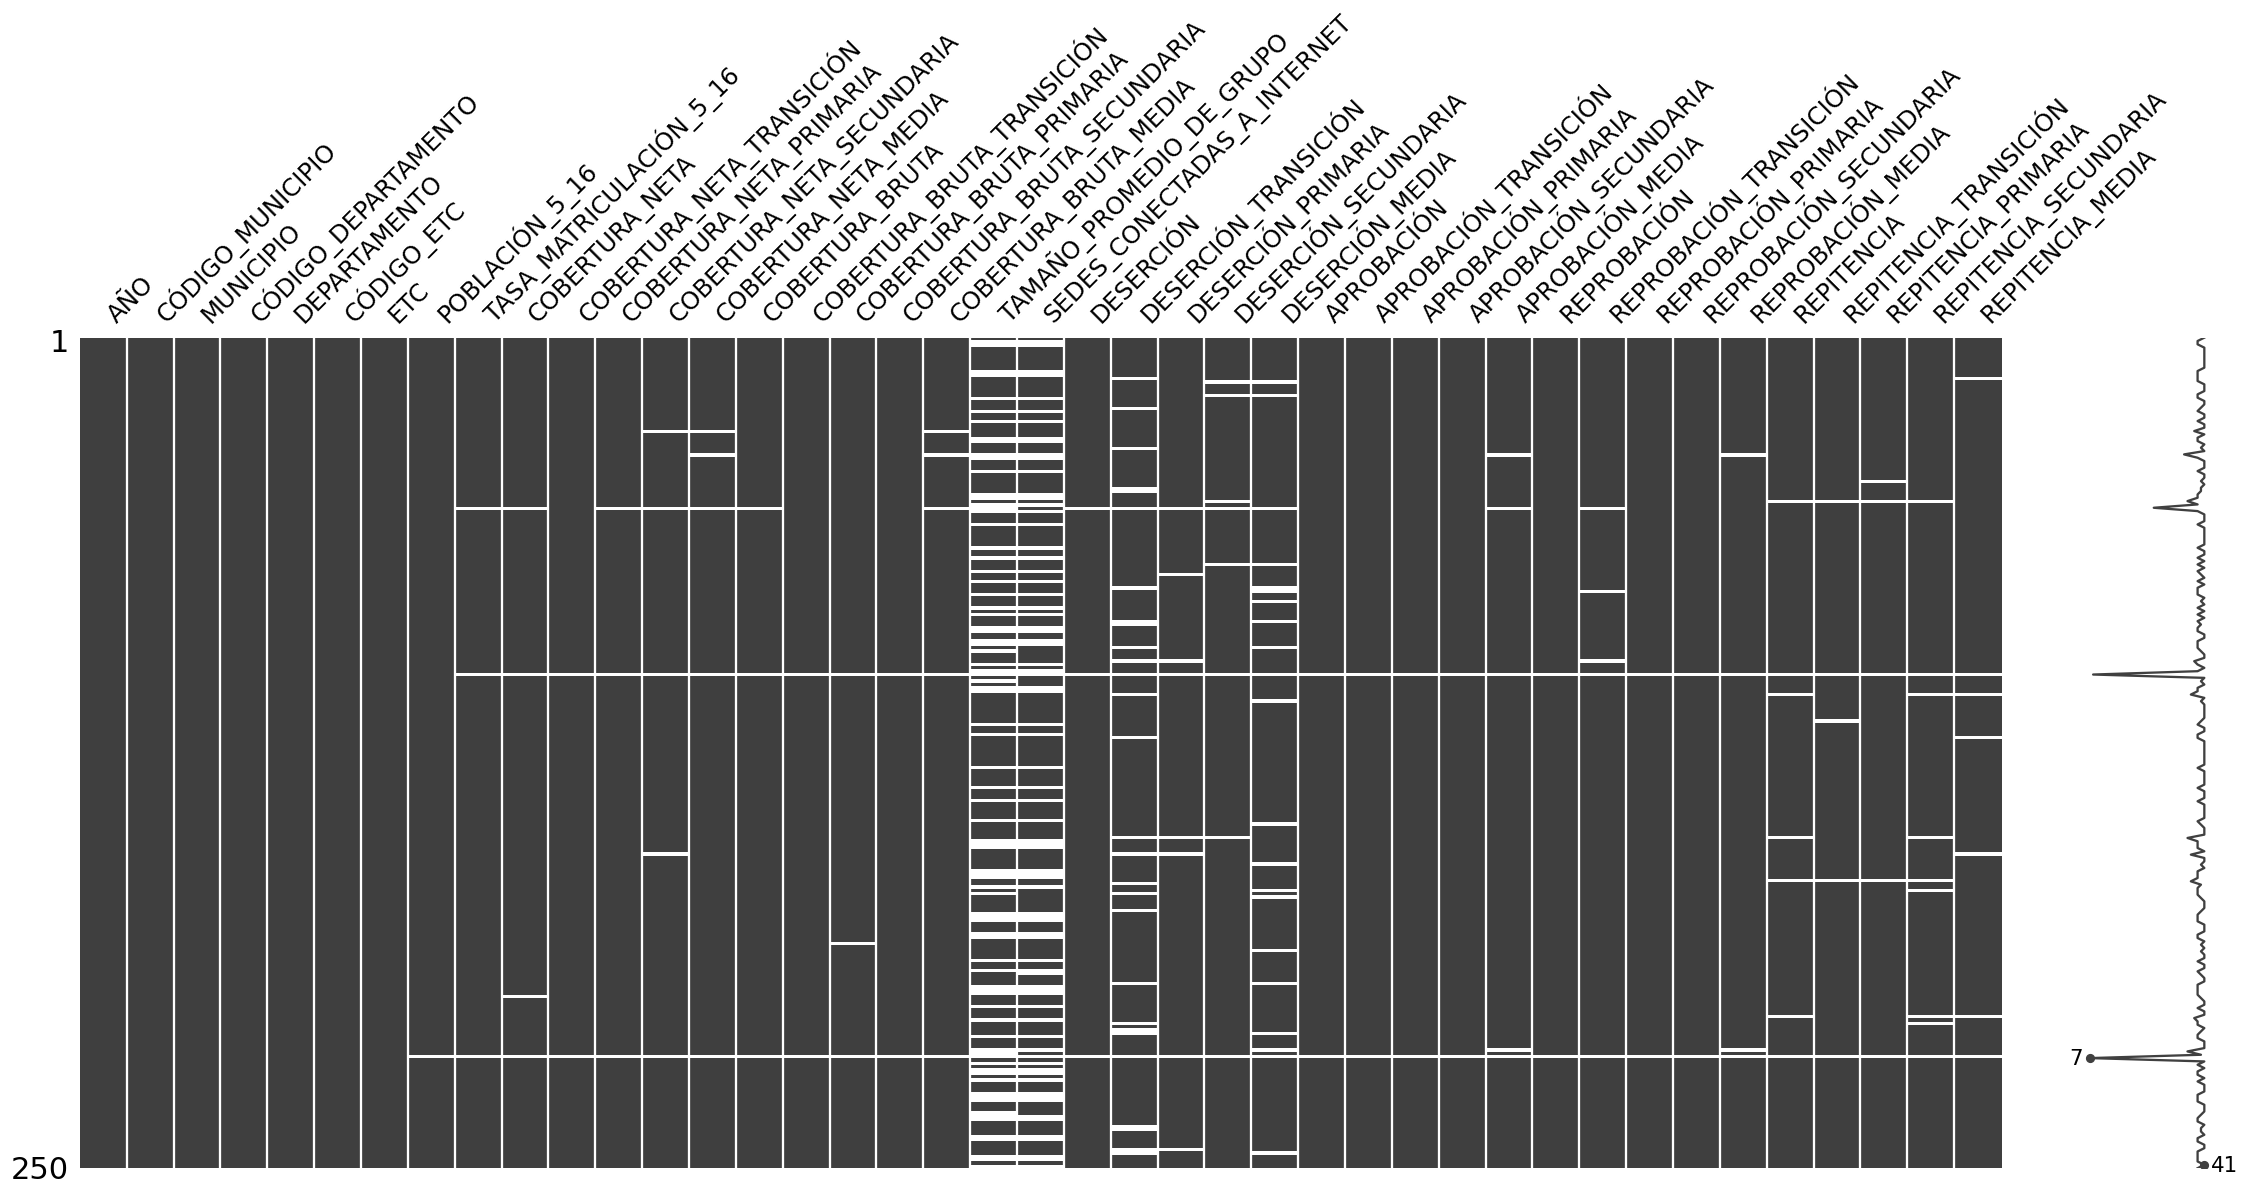

In [ ]:
msno.matrix(df.sample(250))

### *2.3.1 Sobre los datos faltantes*
Una sede que sufre un impacto en su infraestructura debe ser reconstruida y en ocasiones, en una vigencia deja de reportarse matrícula, pero una vez se adecúa, los estudiantes retornan . Por tanto, a nivel de sedes educativas y establecimientos es probable que el usuario encuentre años con datos
perdidos o no diligenciados.

Es importante tener en cuenta que algunas sedes sufren cierres temporales en una vigencia y
su matrícula es nula durante esa vigencia. Una vez se reactiva la sede, la matrícula se estabiliza
nuevamente; de este modo, a nivel de sedes educativas y establecimientos, es probable que el
usuario encuentre años con datos perdidos o no diligenciados.

In [ ]:
#Municipio con cero sedes conectadas a internet
df['SEDES_CONECTADAS_A_INTERNET']
df['MUNICIPIO'].loc[11214]

'Yavaraté'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11219 entries, 0 to 11218
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AÑO                          11219 non-null  int64  
 1   CÓDIGO_MUNICIPIO             11219 non-null  int64  
 2   MUNICIPIO                    11219 non-null  object 
 3   CÓDIGO_DEPARTAMENTO          11219 non-null  int64  
 4   DEPARTAMENTO                 11219 non-null  object 
 5   CÓDIGO_ETC                   11219 non-null  int64  
 6   ETC                          11219 non-null  object 
 7   POBLACIÓN_5_16               11213 non-null  float64
 8   TASA_MATRICULACIÓN_5_16      11104 non-null  float64
 9   COBERTURA_NETA               11108 non-null  float64
 10  COBERTURA_NETA_TRANSICIÓN    11167 non-null  float64
 11  COBERTURA_NETA_PRIMARIA      11128 non-null  float64
 12  COBERTURA_NETA_SECUNDARIA    11125 non-null  float64
 13  COBERTURA_NETA_M

In [ ]:
df.sample(5)

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,CÓDIGO_ETC,ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
6951,2017,15180,Chiscas,15,Boyacá,3769,Boyacá (ETC),912.0,69.50,69.52,...,4.90,0.00,4.44,5.26,7.77,0.15,0.00,0.37,0.00,0.00
10060,2019,86865,Valle del Guamuez,86,Putumayo,3826,Putumayo (ETC),7693.0,88.56,88.55,...,8.93,0.61,7.98,12.00,7.14,1.84,0.82,1.50,2.56,1.32
5685,2016,5480,Mutatá,5,Antioquia,3758,Antioquia (ETC),5122.0,91.40,91.41,...,1.39,0.00,1.81,0.96,1.13,0.12,0.00,0.11,0.15,0.38
1225,2012,5679,Santa Bárbara,5,Antioquia,3758,Antioquia (ETC),5086.0,91.57,91.60,...,4.67,0.00,2.72,8.54,4.57,1.73,0.23,0.91,3.68,1.13
8071,2018,15162,Cerinza,15,Boyacá,3769,Boyacá (ETC),614.0,79.54,89.74,...,8.58,0.00,7.59,12.55,4.30,0.00,0.00,0.00,0.00,0.00


In [ ]:
df.head(5)

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,CÓDIGO_ETC,ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2011,5001,Medellín,5,Antioquia,3759,Medellín,386466.0,108.73,108.5,...,0.03,0.00,0.00,0.01,0.17,4.57,0.15,3.26,7.44,2.95
1,2011,5002,Abejorral,5,Antioquia,3758,Antioquia (ETC),4146.0,97.81,97.8,...,1.70,0.00,1.23,2.96,1.18,0.89,0.00,0.85,1.08,1.23
2,2011,5004,Abriaquí,5,Antioquia,3758,Antioquia (ETC),483.0,88.61,88.6,...,7.29,0.00,1.47,14.66,7.46,1.69,3.13,1.47,2.22,0.00
3,2011,5021,Alejandría,5,Antioquia,3758,Antioquia (ETC),702.0,118.52,118.5,...,3.58,0.00,2.16,4.39,8.04,0.60,0.00,0.96,0.00,0.00
4,2011,5030,Amagá,5,Antioquia,3758,Antioquia (ETC),6631.0,78.65,78.7,...,8.99,0.24,6.73,14.46,7.45,0.42,0.00,0.24,0.91,0.00


In [ ]:
df.shape

(11219, 41)

In [ ]:
df.size

459979

In [ ]:
df['AÑO'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
#número de municipios
df['MUNICIPIO'].unique()
df['MUNICIPIO'].nunique()

1036

In [ ]:
#número de departamentos
df['DEPARTAMENTO'].unique()
df['DEPARTAMENTO'].nunique()

35

Departamentos

In [ ]:
df['DEPARTAMENTO'].value_counts()

Antioquia                                                   1250
Boyacá                                                      1230
Cundinamarca                                                1160
Santander                                                    870
Nariño                                                       640
Tolima                                                       470
Bolívar                                                      460
Valle del Cauca                                              420
Cauca                                                        420
Norte de Santander                                           400
Huila                                                        370
Chocó                                                        300
Magdalena                                                    300
Córdoba                                                      300
Meta                                                         290
Caldas                   

De aquí observamos existen dos departamentos repetidos, a saber Archipiélago de San Andrés Providencia y Santa Catalina y
Bogotá D.C.  pareciera que es un error de digitación. Sin embargo con el siguiente código verificaremos si son datos repetidos en cada una de las variables de dichas filas.

In [ ]:
#captura de datos de los departamentos repetidos
df_bog_1 = df.loc[df['DEPARTAMENTO'] == 'Bogotá, D.C.']
df_bog_2 = df.loc[df['DEPARTAMENTO'] == 'Bogotá D.C.']
df_san_1 = df.loc[df['DEPARTAMENTO'] == 'Archipiélago de San Andrés, Providencia y Santa Catalina']
df_san_2 = df.loc[df['DEPARTAMENTO'] == 'Archipiélago de San Andrés. Providencia y Santa Catalina']
df_deparatamentos_repetidos = pd.concat([df_bog_1, df_bog_2, df_san_1,df_san_2]) 
df_deparatamentos_repetidos


,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,CÓDIGO_ETC,ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
148,2011,11001,"Bogotá, D.C.",11,"Bogotá, D.C.",3766,"Bogotá, D.C. (ETC)",1479334.0,90.70,90.30,...,0.00,0.00,0.00,0.00,0.00,NaN,1.05,6.49,NaN,NaN
1274,2012,11001,"Bogotá, D.C.",11,"Bogotá, D.C.",3766,"Bogotá, D.C. (ETC)",1470171.0,86.94,86.50,...,0.00,0.00,0.00,0.00,0.00,NaN,0.58,5.47,NaN,NaN
2395,2013,11001,"Bogotá, D.C.",11,"Bogotá, D.C.",3766,"Bogotá, D.C. (ETC)",1466854.0,84.50,84.10,...,0.00,0.01,0.00,0.00,0.00,6.89,0.91,4.88,10.78,5.54
3520,2014,11001,"Bogotá, D.C.",11,"Bogotá, D.C.",3766,"Bogotá, D.C. (ETC)",1460379.0,80.79,92.76,...,0.14,0.00,0.06,0.25,0.17,5.17,0.19,3.61,8.31,4.08
4638,2015,11001,"Bogotá, D.C.",11,"Bogotá, D.C.",3766,"Bogotá, D.C. (ETC)",1455309.0,82.20,81.77,...,0.09,0.00,0.03,0.12,0.23,3.23,0.03,2.30,5.11,2.57
5764,2016,11001,"Bogotá, D.C.",11,"Bogotá, D.C.",3766,"Bogotá, D.C. (ETC)",1453283.0,80.70,80.26,...,0.37,0.00,0.04,0.17,2.00,3.73,0.04,2.92,6.01,2.09
6887,2017,11001,"Bogotá, D.C.",11,"Bogotá, D.C.",3766,"Bogotá, D.C. (ETC)",1452849.0,79.90,79.45,...,1.09,0.04,0.64,1.36,2.27,0.14,0.01,0.14,0.20,0.06
8010,2018,11001,"Bogotá, D.C.",11,"Bogotá, D.C.",3766,"Bogotá, D.C. (ETC)",1179282.0,78.71,96.51,...,0.33,0.00,0.01,0.07,2.15,0.33,0.02,0.24,0.57,0.21
9126,2019,11001,"Bogotá, D.C.",11,"Bogotá, D.C.",3766,"Bogotá, D.C. (ETC)",1181531.0,96.82,96.30,...,0.90,0.03,0.53,0.98,2.34,2.62,0.08,2.26,3.98,1.44
10246,2020,11001,Bogotá D.C.,11,Bogotá D.C.,3766,Bogotá D.C. (ETC),1181597.0,96.41,95.89,...,5.14,0.42,3.21,7.51,7.33,3.75,0.07,3.14,5.71,2.27


Con la información de los últimos dos dataframe concluimos que los departamentos contados doble vez son de diferente año, así dejaremos una notación uniforme e incluiremos a Bogotá D.C dentro del departamento de Cundinamarca. Adelantando así una preparación de los datos.

In [ ]:
df.loc[df.DEPARTAMENTO == 'Bogotá, D.C.', 'DEPARTAMENTO']= 'Cundinamarca'
df.loc[df.DEPARTAMENTO == 'Bogotá D.C.', 'DEPARTAMENTO'] = 'Cundinamarca'
df.loc[df.MUNICIPIO == 'Bogotá, D.C.', 'MUNICIPIO'] = 'Bogotá D.C.' # Corregimos tambén el nombre en Municipio
df.loc[df.DEPARTAMENTO == 'Archipiélago de San Andrés. Providencia y Santa Catalina', 'DEPARTAMENTO'] = 'Archipiélago de San Andrés, Providencia y Santa Catalina'

A= df.loc[df['MUNICIPIO'] == 'Bogotá D.C.']
B = df.loc[df['DEPARTAMENTO'] == 'Archipiélago de San Andrés, Providencia y Santa Catalina']
df_dep_corregidos = pd.concat([A, B]) 
df_dep_corregidos 


,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,CÓDIGO_ETC,ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
148,2011,11001,Bogotá D.C.,11,Cundinamarca,3766,"Bogotá, D.C. (ETC)",1479334.0,90.70,90.30,...,0.00,0.00,0.00,0.00,0.00,NaN,1.05,6.49,NaN,NaN
1274,2012,11001,Bogotá D.C.,11,Cundinamarca,3766,"Bogotá, D.C. (ETC)",1470171.0,86.94,86.50,...,0.00,0.00,0.00,0.00,0.00,NaN,0.58,5.47,NaN,NaN
2395,2013,11001,Bogotá D.C.,11,Cundinamarca,3766,"Bogotá, D.C. (ETC)",1466854.0,84.50,84.10,...,0.00,0.01,0.00,0.00,0.00,6.89,0.91,4.88,10.78,5.54
3520,2014,11001,Bogotá D.C.,11,Cundinamarca,3766,"Bogotá, D.C. (ETC)",1460379.0,80.79,92.76,...,0.14,0.00,0.06,0.25,0.17,5.17,0.19,3.61,8.31,4.08
4638,2015,11001,Bogotá D.C.,11,Cundinamarca,3766,"Bogotá, D.C. (ETC)",1455309.0,82.20,81.77,...,0.09,0.00,0.03,0.12,0.23,3.23,0.03,2.30,5.11,2.57
5764,2016,11001,Bogotá D.C.,11,Cundinamarca,3766,"Bogotá, D.C. (ETC)",1453283.0,80.70,80.26,...,0.37,0.00,0.04,0.17,2.00,3.73,0.04,2.92,6.01,2.09
6887,2017,11001,Bogotá D.C.,11,Cundinamarca,3766,"Bogotá, D.C. (ETC)",1452849.0,79.90,79.45,...,1.09,0.04,0.64,1.36,2.27,0.14,0.01,0.14,0.20,0.06
8010,2018,11001,Bogotá D.C.,11,Cundinamarca,3766,"Bogotá, D.C. (ETC)",1179282.0,78.71,96.51,...,0.33,0.00,0.01,0.07,2.15,0.33,0.02,0.24,0.57,0.21
9126,2019,11001,Bogotá D.C.,11,Cundinamarca,3766,"Bogotá, D.C. (ETC)",1181531.0,96.82,96.30,...,0.90,0.03,0.53,0.98,2.34,2.62,0.08,2.26,3.98,1.44
10246,2020,11001,Bogotá D.C.,11,Cundinamarca,3766,Bogotá D.C. (ETC),1181597.0,96.41,95.89,...,5.14,0.42,3.21,7.51,7.33,3.75,0.07,3.14,5.71,2.27


Si bien se incluyó a Bogotá en el departamento de Cundinamarca, la variable CÓDIGO_DEPARTAMENTO no fué modificada, previendo que más adelante necesitemos esta discriminación.

## 2.4 Análisis con estadística descriptiva.

Medidas de tendencia central

In [ ]:
df.describe()

,AÑO,CÓDIGO_MUNICIPIO,CÓDIGO_DEPARTAMENTO,CÓDIGO_ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
count,11219.000000,11219.000000,11219.000000,11219.000000,1.121300e+04,11104.000000,11108.000000,11167.000000,11128.000000,11125.000000,...,11133.000000,11126.000000,11122.000000,11113.000000,11074.000000,11076.000000,11060.000000,11071.000000,11067.000000,11080.000000
mean,2015.499599,38711.424102,38.277565,3835.222658,8.982535e+03,84.870485,85.642303,56.896306,82.836770,69.206538,...,4.203293,0.474881,3.389058,6.018212,3.726559,2.184950,0.586585,2.050235,2.888992,1.140021
std,2.872223,26560.175053,26.573582,486.043248,4.730575e+04,19.418772,17.352458,16.597809,17.817125,19.033180,...,3.940720,1.697596,3.649328,6.076911,4.111280,2.320595,1.594208,2.431129,3.296678,1.711521
min,2011.000000,5001.000000,5.000000,3758.000000,9.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,15676.000000,15.000000,3769.000000,1.465000e+03,74.110000,76.890000,46.300000,73.200000,59.560000,...,0.320000,0.000000,0.000000,0.000000,0.320000,0.470000,0.000000,0.390000,0.440000,0.000000
50%,2015.000000,25839.000000,25.000000,3786.000000,3.046000e+03,85.270000,86.660000,57.100000,83.190000,70.250000,...,3.690000,0.000000,2.600000,4.860000,2.490000,1.420000,0.000000,1.260000,1.730000,0.510000
75%,2018.000000,66572.000000,66.000000,3808.000000,6.332000e+03,95.872500,94.680000,67.440000,92.600000,80.060000,...,6.780000,0.157500,5.460000,9.800000,5.880000,3.150000,0.580000,2.890000,4.210000,1.600000
max,2020.000000,99773.000000,99.000000,10930.000000,1.479334e+06,279.030000,264.540000,150.470000,254.960000,229.440000,...,49.390000,52.710000,51.970000,76.970000,67.860000,34.520000,33.070000,50.760000,30.900000,31.250000


## 2.5 Previsualización de los datos estadísticos

In [ ]:
ANIOS_DES= df.groupby('AÑO').agg({'DESERCIÓN' : np.mean, 'REPROBACIÓN' : np.mean,'REPITENCIA' : np.mean})
ANIOS_DES

,DESERCIÓN,REPROBACIÓN,REPITENCIA
AÑO,,,
2011,4.216292,2.368197,1.358244
2012,4.054294,3.368640,1.348067
2013,3.454746,3.335321,1.436828
2014,3.064640,1.821303,1.608838
2015,3.122206,4.391508,2.137703
2016,3.716527,4.582518,2.098893
2017,3.172321,4.920571,2.391723
2018,3.054857,5.215321,1.981652
2019,3.069991,5.395286,2.047902


Text(0.5, 1.0, 'COMPARACIÓN ENTRE MÉDIAS DE DESERCIÓN, REPROBACIÓN Y REPITENCIA POR AÑO')

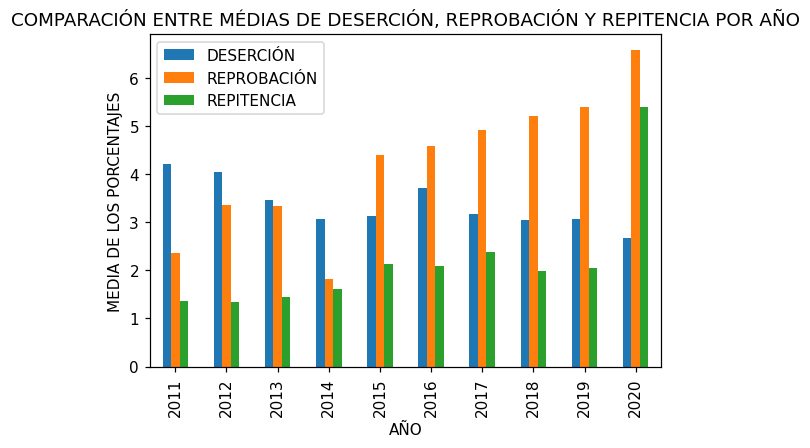

In [ ]:
grafica_barra_1=ANIOS_DES.plot.bar(y = ['DESERCIÓN','REPROBACIÓN','REPITENCIA'])
grafica_barra_1.set_xlabel('AÑO')
grafica_barra_1.set_ylabel('MEDIA DE LOS PORCENTAJES')
grafica_barra_1.set_title('COMPARACIÓN ENTRE MÉDIAS DE DESERCIÓN, REPROBACIÓN Y REPITENCIA POR AÑO')

In [ ]:
plot2 = sns.lmplot(x="AÑO", 
                   y="REPROBACIÓN", 
                   col="DEPARTAMENTO",
                   palette='viridis', 
                   data=ANIOS_DES);

NameError: ignored

# 3. Preparación de los datos.


##3.1 Limpieza e imputación de los datos.
En este paso eliminamos la variable 'TAMAÑO_PROMEDIO_DE_GRUPO' y a los datos faltantes en 'SEDES_CONECTADAS_A_INTERNET' serán imputados con 0.

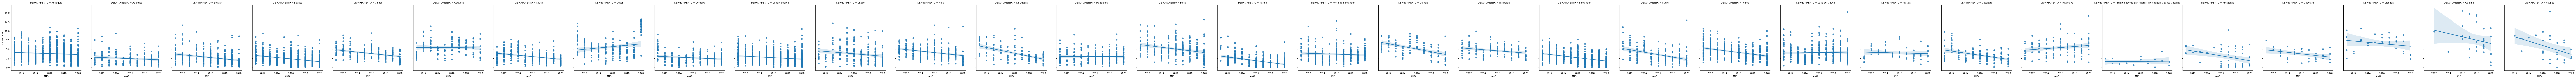

In [ ]:
plot2 = sns.lmplot(x="AÑO", 
                   y="DESERCIÓN", 
                   col="DEPARTAMENTO",
                   palette='viridis', 
                   data=nANIOS_DES);

In [ ]:
#Eliminación de columnas con datos faltantes
non_null_colum_df = pd.DataFrame(df.drop(['TAMAÑO_PROMEDIO_DE_GRUPO'],axis = 1))
#Imputación de datos faltantes en la varaible SEDES_CONECTADAS_A_INTERNET
non_null_colum_df['SEDES_CONECTADAS_A_INTERNET'] = df['SEDES_CONECTADAS_A_INTERNET'].fillna(0)
#Eliminación de filas con datos faltantes
non_null_df = pd.DataFrame(non_null_colum_df.dropna(axis = 0))
non_null_df.count()


AÑO                            9304
CÓDIGO_MUNICIPIO               9304
MUNICIPIO                      9304
CÓDIGO_DEPARTAMENTO            9304
DEPARTAMENTO                   9304
CÓDIGO_ETC                     9304
ETC                            9304
POBLACIÓN_5_16                 9304
TASA_MATRICULACIÓN_5_16        9304
COBERTURA_NETA                 9304
COBERTURA_NETA_TRANSICIÓN      9304
COBERTURA_NETA_PRIMARIA        9304
COBERTURA_NETA_SECUNDARIA      9304
COBERTURA_NETA_MEDIA           9304
COBERTURA_BRUTA                9304
COBERTURA_BRUTA_TRANSICIÓN     9304
COBERTURA_BRUTA_PRIMARIA       9304
COBERTURA_BRUTA_SECUNDARIA     9304
COBERTURA_BRUTA_MEDIA          9304
SEDES_CONECTADAS_A_INTERNET    9304
DESERCIÓN                      9304
DESERCIÓN_TRANSICIÓN           9304
DESERCIÓN_PRIMARIA             9304
DESERCIÓN_SECUNDARIA           9304
DESERCIÓN_MEDIA                9304
APROBACIÓN                     9304
APROBACIÓN_TRANSICIÓN          9304
APROBACIÓN_PRIMARIA         

## 3.2 Preprocesamiento de los datos

En los análisis anteriores se observó que la TASA_MATRICULACIÓN_5_16  son porcentajes respecto a la variable POBLACIÓN_5_16, sacando este porcentaje obtenemos el número de estudiantes matriculados colocado en la columna MATRICULADOS_CIFRAS  en un nuevo dataframe `df_cifras`.

Ahora la COBERTURA_NETA, COBERTURA_BRUTA, DESERCIÓN, REPITENCIA, APROBACIÓN y REAPROBACIÓN son porcentajes de acuerdo a la variable MATRICULADOS_CIFRAS, por tanto extrayendo el porcentaje obtenemos dichas cantidades que son colocadas respectivamente en las series COBERTURA_NETA_CIFRAS, COBERTURA_BRUTA_CIFRAS, DESERCIÓN_CIFRAS, REPITENCIA_CIFRAS, APROBACIÓN_CIFRAS y REPROBACIÓN_CIFRAS en el DataFrame `df_cifras`.

Con un proceso análogo al descrito anteriormente, obtenemos los porcentajes para cada rango de la educación, _TRANSICIÓN, _PRIMARIA _SECUNDARIA Y _MEDIA en cada una de las variables COBERTURA_NETA, COBERTURA_BRUTA, DESERCIÓN, REPITENCIA, APROBACIÓN y REPROBACIÓN.

Así convierten los porcentajes de dataframe original `df` en números de habitantes, para obtener la magnitud de la población a la que pertence cada grupo.



In [ ]:

df_cifras= df.copy()
df_cifras['MATRICULADOS_CIFRAS']= round((df_cifras.POBLACIÓN_5_16 * df_cifras.TASA_MATRICULACIÓN_5_16)/100)

df_cifras_PRUEBA= df.copy()
df_cifras_PRUEBA['MATRICULADOS_CIFRAS']= round((df_cifras.POBLACIÓN_5_16 * df_cifras.TASA_MATRICULACIÓN_5_16)/100)
df_cifras_PRUEBA['DESERCIÓN_CIFRAS']= round((df_cifras.MATRICULADOS_CIFRAS * df_cifras.DESERCIÓN)/100)
df_cifras_PRUEBA['REPITENCIA_CIFRAS']= round((df_cifras.MATRICULADOS_CIFRAS * df_cifras.REPITENCIA)/100)
df_cifras_PRUEBA['REPROBACIÓN_CIFRAS']= round((df_cifras.MATRICULADOS_CIFRAS * df_cifras.REPROBACIÓN)/100)
df_cifras_PRUEBA[['POBLACIÓN_5_16','TASA_MATRICULACIÓN_5_16','MATRICULADOS_CIFRAS','DESERCIÓN','DESERCIÓN_CIFRAS','REPITENCIA_CIFRAS','REPROBACIÓN_CIFRAS']]

,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,MATRICULADOS_CIFRAS,DESERCIÓN,DESERCIÓN_CIFRAS,REPITENCIA_CIFRAS,REPROBACIÓN_CIFRAS
0,386466.0,108.73,420204.0,3.69,15506.0,19203.0,126.0
1,4146.0,97.81,4055.0,6.26,254.0,36.0,69.0
2,483.0,88.61,428.0,0.81,3.0,7.0,31.0
3,702.0,118.52,832.0,4.03,34.0,5.0,30.0
4,6631.0,78.65,5215.0,4.16,217.0,22.0,469.0
...,...,...,...,...,...,...,...
11214,545.0,48.62,265.0,4.95,13.0,14.0,33.0
11215,4608.0,127.24,5863.0,2.36,138.0,560.0,573.0
11216,2511.0,98.05,2462.0,3.51,86.0,214.0,128.0
11217,1153.0,87.86,1013.0,3.47,35.0,114.0,97.0


In [ ]:
ANIOS_DES_2= df_cifras_PRUEBA.groupby('AÑO').agg({'DESERCIÓN_CIFRAS' : sum, 'REPROBACIÓN_CIFRAS' : sum,'REPITENCIA_CIFRAS' : sum})
ANIOS_DES_2

,DESERCIÓN_CIFRAS,REPROBACIÓN_CIFRAS,REPITENCIA_CIFRAS
AÑO,,,
2011,380796.0,194327.0,130824.0
2012,381119.0,261845.0,123639.0
2013,323547.0,268492.0,206169.0
2014,264991.0,158819.0,198864.0
2015,284463.0,395392.0,229304.0
2016,318769.0,418525.0,221433.0
2017,261071.0,446330.0,225799.0
2018,250416.0,469949.0,158506.0
2019,269389.0,501976.0,195103.0


Text(0.5, 1.0, 'COMPARACIÓN ENTRE DESERCIÓN_CIFRAS, REPROBACIÓN_CIFRAS,REPITENCIA_CIFRAS POR AÑO')

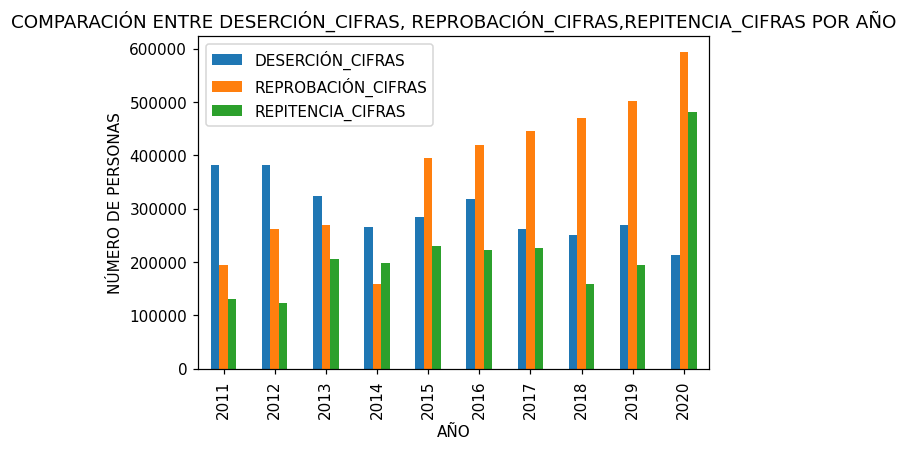

In [ ]:
graf_1 = ANIOS_DES_2.plot.bar(y = ['DESERCIÓN_CIFRAS','REPROBACIÓN_CIFRAS','REPITENCIA_CIFRAS']);
graf_1.set_xlabel('AÑO')
graf_1.set_ylabel('NÚMERO DE PERSONAS')
graf_1.set_title('COMPARACIÓN ENTRE DESERCIÓN_CIFRAS, REPROBACIÓN_CIFRAS,REPITENCIA_CIFRAS POR AÑO')

Se observa que la gráfica es coherente con la de porcentajes que está arriba, solo que en este caso ya estaría en miles de estudiantes, lo que nos lleva a generar el siguiente dataframe para establecerlo como dataframe base a lo largo de todo el resto de trabajo.

###*3.3.1 Procesamiento y transformación de los datos* 
Después de la limpieza de los datos y adecuadas correcciones de ortografía creamos el dataframe `df_cifras` el cual contiene todos los porcentajes del dataframe anterior expresadas en número promedio de personas. De aqui en adelante `df_cifras` será el dataframe a considerar en cada proceso.

## De `df_cifras` serán extraídas combinaciones  de dataframes más pequeños clasificados por año, por regiones y por nível de educación, esto con el fin de cuidar los resultados en las correlaciones. 


In [ ]:
#
df_cifras= non_null_df.copy()
df_cifras['MATRICULADOS_CIFRAS']= round((df_cifras.POBLACIÓN_5_16 * df_cifras.TASA_MATRICULACIÓN_5_16)/100)
#COBERTURA_NETA
df_cifras['COBERTURA_NETA_CIFRAS']= round((df_cifras.MATRICULADOS_CIFRAS * df_cifras.COBERTURA_NETA)/100)
df_cifras['COBERTURA_NETA_TRANSICIÓN_CIFRAS']= round((df_cifras.COBERTURA_NETA_CIFRAS * df_cifras.COBERTURA_NETA_TRANSICIÓN)/100)
df_cifras['COBERTURA_NETA_PRIMARIA_CIFRAS']= round((df_cifras.COBERTURA_NETA_CIFRAS * df_cifras.COBERTURA_NETA_PRIMARIA)/100)
df_cifras['COBERTURA_NETA_SECUNDARIA_CIFRAS']= round((df_cifras.COBERTURA_NETA_CIFRAS * df_cifras.COBERTURA_NETA_SECUNDARIA)/100)
df_cifras['COBERTURA_NETA_MEDIA_CIFRAS']= round((df_cifras.COBERTURA_NETA_CIFRAS * df_cifras.COBERTURA_NETA_MEDIA)/100)
#COBERTURA_BRUTA
df_cifras['COBERTURA_BRUTA_CIFRAS']= round((df_cifras.MATRICULADOS_CIFRAS * df_cifras.COBERTURA_BRUTA)/100)
df_cifras['COBERTURA_BRUTA_TRANSICIÓN_CIFRAS']= round((df_cifras.COBERTURA_BRUTA_CIFRAS * df_cifras.COBERTURA_BRUTA_TRANSICIÓN)/100)
df_cifras['COBERTURA_BRUTA_PRIMARIA_CIFRAS']= round((df_cifras.COBERTURA_BRUTA_CIFRAS * df_cifras.COBERTURA_BRUTA_PRIMARIA)/100)
df_cifras['COBERTURA_BRUTA_SECUNDARIA_CIFRAS']= round((df_cifras.COBERTURA_BRUTA_CIFRAS * df_cifras.COBERTURA_BRUTA_SECUNDARIA)/100)
df_cifras['COBERTURA_BRUTA_MEDIA_CIFRAS']= round((df_cifras.COBERTURA_BRUTA_CIFRAS * df_cifras.COBERTURA_BRUTA_MEDIA)/100)
#TAMAÑO_PROMEDIO_DE_GRUPO
#df_cifras['TAMAÑO_PROMEDIO_DE_GRUPO_CIFRAS']= round((df_cifras.MATRICULADOS_CIFRAS * df_cifras.TAMAÑO_PROMEDIO_DE_GRUPO)/100)
#SEDES_CONECTADAS_A_INTERNET NO existe cantidad de sedes enla entidad territorial, se manejarán porcentajes.
#df_cifras['SEDES_CONECTADAS_A_INTERNET_CIFRAS']= round((df_cifras.MATRICULADOS_CIFRAS * df_cifras.SEDES_CONECTADAS_A_INTERNET)/100)
#DESERCIÓN 
df_cifras['DESERCIÓN_CIFRAS']= round((df_cifras.MATRICULADOS_CIFRAS * df_cifras.DESERCIÓN)/100)
df_cifras['DESERCIÓN_TRANSICIÓN_CIFRAS']= round((df_cifras.DESERCIÓN_CIFRAS * df_cifras.DESERCIÓN_TRANSICIÓN)/100)
df_cifras['DESERCIÓN_PRIMARIA_CIFRAS']= round((df_cifras.DESERCIÓN_CIFRAS * df_cifras.DESERCIÓN_PRIMARIA)/100)
df_cifras['DESERCIÓN_SECUNDARIA_CIFRAS']= round((df_cifras.DESERCIÓN_CIFRAS * df_cifras.DESERCIÓN_SECUNDARIA)/100)
df_cifras['DESERCIÓN_MEDIA_CIFRAS']= round((df_cifras.DESERCIÓN_CIFRAS * df_cifras.DESERCIÓN_MEDIA)/100)
#APROBACIÓN
df_cifras['APROBACIÓN_CIFRAS']= round((df_cifras.MATRICULADOS_CIFRAS * df_cifras.APROBACIÓN)/100)
df_cifras['APROBACIÓN_TRANSICIÓN_CIFRAS']= round((df_cifras.APROBACIÓN_CIFRAS * df_cifras.APROBACIÓN_TRANSICIÓN)/100)
df_cifras['APROBACIÓN_PRIMARIA_CIFRAS']= round((df_cifras.APROBACIÓN_CIFRAS * df_cifras.APROBACIÓN_PRIMARIA)/100)
df_cifras['APROBACIÓN_SECUNDARIA_CIFRAS']= round((df_cifras.APROBACIÓN_CIFRAS * df_cifras.APROBACIÓN_SECUNDARIA)/100)
df_cifras['APROBACIÓN_MEDIA_CIFRAS']= round((df_cifras.APROBACIÓN_CIFRAS * df_cifras.APROBACIÓN_MEDIA)/100)
#REPROBACIÓN 
df_cifras['REPROBACIÓN_CIFRAS']= round((df_cifras.MATRICULADOS_CIFRAS * df_cifras.REPROBACIÓN)/100)
df_cifras['REPROBACIÓN_TRANSICIÓN_CIFRAS']= round((df_cifras.REPROBACIÓN_CIFRAS * df_cifras.REPROBACIÓN_TRANSICIÓN)/100)
df_cifras['REPROBACIÓN_PRIMARIA_CIFRAS']= round((df_cifras.REPROBACIÓN_CIFRAS * df_cifras.REPROBACIÓN_PRIMARIA)/100)
df_cifras['REPROBACIÓN_SECUNDARIA_CIFRAS']= round((df_cifras.REPROBACIÓN_CIFRAS * df_cifras.REPROBACIÓN_SECUNDARIA)/100)
df_cifras['REPROBACIÓN_MEDIA_CIFRAS']= round((df_cifras.REPROBACIÓN_CIFRAS * df_cifras.REPROBACIÓN_MEDIA)/100)
#REPITENCIA
df_cifras['REPITENCIA_CIFRAS']= round((df_cifras.MATRICULADOS_CIFRAS * df_cifras.REPITENCIA)/100)
df_cifras['REPITENCIA_TRANSICIÓN_CIFRAS']= round((df_cifras.REPITENCIA_CIFRAS * df_cifras.REPITENCIA_TRANSICIÓN)/100)
df_cifras['REPITENCIA_PRIMARIA_CIFRAS']= round((df_cifras.REPITENCIA_CIFRAS * df_cifras.REPITENCIA_PRIMARIA)/100)
df_cifras['REPITENCIA_SECUNDARIA_CIFRAS']= round((df_cifras.REPITENCIA_CIFRAS * df_cifras.REPITENCIA_SECUNDARIA )/100)
df_cifras['REPITENCIA_MEDIA_CIFRAS']= round((df_cifras.REPITENCIA_CIFRAS * df_cifras.REPITENCIA_MEDIA)/100)

df_cifras.sample(5)
df_cifras.loc[df_cifras['AÑO']==2014]

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,CÓDIGO_ETC,ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,...,REPROBACIÓN_CIFRAS,REPROBACIÓN_TRANSICIÓN_CIFRAS,REPROBACIÓN_PRIMARIA_CIFRAS,REPROBACIÓN_SECUNDARIA_CIFRAS,REPROBACIÓN_MEDIA_CIFRAS,REPITENCIA_CIFRAS,REPITENCIA_TRANSICIÓN_CIFRAS,REPITENCIA_PRIMARIA_CIFRAS,REPITENCIA_SECUNDARIA_CIFRAS,REPITENCIA_MEDIA_CIFRAS
3369,2014,5001,Medellín,5,Antioquia,3759,Medellín,374411.0,105.93,86.06,...,23242.0,26.0,902.0,2215.0,1378.0,5949.0,5.0,62.0,154.0,46.0
3370,2014,5002,Abejorral,5,Antioquia,3758,Antioquia (ETC),3894.0,93.61,90.09,...,63.0,0.0,1.0,2.0,1.0,68.0,0.0,2.0,0.0,0.0
3373,2014,5030,Amagá,5,Antioquia,3758,Antioquia (ETC),6522.0,73.06,89.65,...,276.0,0.0,16.0,19.0,14.0,186.0,1.0,6.0,11.0,6.0
3374,2014,5031,Amalfi,5,Antioquia,3758,Antioquia (ETC),5302.0,97.55,87.63,...,8.0,0.0,0.0,0.0,0.0,71.0,0.0,1.0,1.0,1.0
3375,2014,5034,Andes,5,Antioquia,3758,Antioquia (ETC),10110.0,78.67,89.18,...,2.0,0.0,0.0,0.0,0.0,294.0,1.0,15.0,10.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,2014,95025,El Retorno,95,Guaviare,3830,Guaviare (ETC),6819.0,42.67,84.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4478,2014,95200,Miraflores,95,Guaviare,3830,Guaviare (ETC),3332.0,32.05,82.28,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4479,2014,97001,Mitú,97,Vaupés,3831,Vaupés (ETC),9250.0,62.74,83.93,...,170.0,0.0,4.0,6.0,13.0,276.0,5.0,16.0,10.0,3.0
4484,2014,99001,Puerto Carreño,99,Vichada,3832,Vichada (ETC),4488.0,95.61,86.17,...,3.0,0.0,0.0,0.0,0.0,70.0,1.0,1.0,1.0,0.0


Construcción de subdataframes clasificados por años y por nivel.

Función que devuelve de subdataframe clasificado por años y por nivel académico de todos los departamentos.

In [ ]:
def datas_clasificados(año, nivel):
  nivel_may = nivel.upper()
  grupo_año_df = df_cifras.groupby('AÑO').get_group(año)
  serie_muni = grupo_año_df['MUNICIPIO']
  serie_depa = grupo_año_df['DEPARTAMENTO']
  serie_1 = grupo_año_df['POBLACIÓN_5_16']
  serie_2 = grupo_año_df['TASA_MATRICULACIÓN_5_16']
  serie_3 = grupo_año_df['COBERTURA_NETA']       
  serie_4 = grupo_año_df[f'COBERTURA_NETA_{nivel_may}_CIFRAS']
  serie_5 = grupo_año_df['COBERTURA_BRUTA']                
  serie_6 = grupo_año_df[f'COBERTURA_BRUTA_{nivel_may}_CIFRAS']       
  serie_7 = grupo_año_df['COBERTURA_BRUTA_MEDIA']          
  serie_8 = grupo_año_df['SEDES_CONECTADAS_A_INTERNET']   
  serie_9 = grupo_año_df['DESERCIÓN_CIFRAS']                          
  serie_10 = grupo_año_df[f'DESERCIÓN_{nivel_may}_CIFRAS']
  serie_11 = grupo_año_df['APROBACIÓN_CIFRAS']
  serie_12 = grupo_año_df[f'APROBACIÓN_{nivel_may}_CIFRAS']
  serie_13 = grupo_año_df['REPROBACIÓN_CIFRAS']      
  serie_14 = grupo_año_df[f'REPROBACIÓN_{nivel_may}_CIFRAS']
  serie_15 = grupo_año_df['REPITENCIA_CIFRAS']                    
  serie_16 = grupo_año_df[f'REPITENCIA_{nivel_may}_CIFRAS']
  año_nivel_df = pd.concat([serie_muni, serie_depa, serie_1, serie_2, serie_3, serie_4, serie_5, serie_6, serie_7, serie_8, serie_9, serie_10, serie_11, serie_12, serie_13, serie_14, serie_15, serie_16], axis=1)
  return año_nivel_df

In [ ]:
#Test de la función anterior
clasificados_año_nivel = datas_clasificados(2011, 'media')
clasificados_año_nivel

,MUNICIPIO,DEPARTAMENTO,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_MEDIA_CIFRAS,COBERTURA_BRUTA,COBERTURA_BRUTA_MEDIA_CIFRAS,COBERTURA_BRUTA_MEDIA,SEDES_CONECTADAS_A_INTERNET,DESERCIÓN_CIFRAS,DESERCIÓN_MEDIA_CIFRAS,APROBACIÓN_CIFRAS,APROBACIÓN_MEDIA_CIFRAS,REPROBACIÓN_CIFRAS,REPROBACIÓN_MEDIA_CIFRAS,REPITENCIA_CIFRAS,REPITENCIA_MEDIA_CIFRAS
0,Medellín,Antioquia,386466.0,108.73,108.5,272185.0,125.4,585953.0,111.2,97.37,15506.0,457.0,404572.0,391949.0,126.0,0.0,19203.0,566.0
1,Abejorral,Antioquia,4146.0,97.81,97.8,1440.0,107.4,3005.0,69.0,68.66,254.0,22.0,3732.0,3371.0,69.0,1.0,36.0,0.0
4,Amagá,Antioquia,6631.0,78.65,78.7,1596.0,87.7,3348.0,73.2,83.33,217.0,7.0,4530.0,4047.0,469.0,35.0,22.0,0.0
6,Andes,Antioquia,10244.0,84.45,84.5,2354.0,91.7,4871.0,61.4,93.44,343.0,6.0,8258.0,7897.0,50.0,1.0,468.0,19.0
7,Angelópolis,Antioquia,1707.0,78.85,78.9,280.0,82.8,447.0,40.1,100.00,110.0,3.0,1161.0,1048.0,75.0,5.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,San José del Guaviare,Guaviare,18320.0,74.51,74.5,2471.0,89.8,7171.0,58.5,13.70,1007.0,69.0,12613.0,11458.0,29.0,1.0,221.0,3.0
1120,Puerto Carreño,Vichada,4476.0,85.14,84.7,1014.0,96.8,2833.0,76.8,56.52,95.0,1.0,3704.0,3664.0,12.0,0.0,65.0,1.0
1121,La Primavera,Vichada,3983.0,58.32,58.3,276.0,62.6,579.0,39.8,40.00,111.0,5.0,2206.0,2111.0,6.0,0.0,43.0,1.0
1122,Santa Rosalía,Vichada,1197.0,67.75,67.8,86.0,76.7,220.0,35.3,26.67,68.0,2.0,733.0,709.0,10.0,0.0,5.0,0.0


Dado el dataframe de clasificación por año y por nivel de educación obtenido con la función anterior `clasificados_año_nivel()`, tiene como argumentos: año  y  nivel de educación, y retorna un dataframe de solo el año con variables correspodientes a nivel educativo, este dataframe obtenido será pasado como uno de los argumentos en la siguiente función `cassifica_departamento()`, junto con el nivel educativo, que corresponde con el nivel educativo del dataframe del argumento. 

La  función `cassifica_departamento()` retona el dataframe  `clasificados_año_nivel` agrupado por departamentos. Apropiado seleccionar el departamento de estudio.

In [ ]:
# clasificados_año_nivel agrupados por departamento
def clasifica_departamento(nivel, df_clasificados_año_nivel):
  nivel_may = nivel.upper()
  por_depa = df_clasificados_año_nivel.groupby('DEPARTAMENTO').agg({'POBLACIÓN_5_16': sum, 'TASA_MATRICULACIÓN_5_16': sum, 'COBERTURA_NETA': sum,       
                                                              f'COBERTURA_NETA_{nivel_may}_CIFRAS': sum, 'COBERTURA_BRUTA': sum,            
                                                              f'COBERTURA_BRUTA_{nivel_may}_CIFRAS': sum, 'COBERTURA_BRUTA_MEDIA':sum,          
                                                              'SEDES_CONECTADAS_A_INTERNET': sum, 'DESERCIÓN_CIFRAS':sum, f'DESERCIÓN_{nivel_may}_CIFRAS': sum,
                                                              'APROBACIÓN_CIFRAS': sum, f'APROBACIÓN_{nivel_may}_CIFRAS': sum, 
                                                              'REPROBACIÓN_CIFRAS': sum, f'REPROBACIÓN_{nivel_may}_CIFRAS': sum, 
                                                              'REPITENCIA_CIFRAS': sum, f'REPITENCIA_{nivel_may}_CIFRAS':sum})
  return por_depa


In [ ]:
#Test de la función arriba y elección del departamento Cundinamarca 2011
departamento_2011= clasifica_departamento('media', clasificados_año_nivel)
departamento_2011.loc['Cundinamarca']

POBLACIÓN_5_16                  503962.00
TASA_MATRICULACIÓN_5_16           7095.81
COBERTURA_NETA                    7086.80
COBERTURA_NETA_MEDIA_CIFRAS     214826.00
COBERTURA_BRUTA                   8003.60
COBERTURA_BRUTA_MEDIA_CIFRAS    435632.00
COBERTURA_BRUTA_MEDIA             6656.50
SEDES_CONECTADAS_A_INTERNET       3235.11
DESERCIÓN_CIFRAS                 17509.00
DESERCIÓN_MEDIA_CIFRAS             802.00
APROBACIÓN_CIFRAS               435761.00
APROBACIÓN_MEDIA_CIFRAS         410371.00
REPROBACIÓN_CIFRAS                5005.00
REPROBACIÓN_MEDIA_CIFRAS           341.00
REPITENCIA_CIFRAS                 8699.00
REPITENCIA_MEDIA_CIFRAS            148.00
Name: Cundinamarca, dtype: float64

# 4. **Desarrollo de los objetivos de trabajo y delimitación del problema**  



**SUBDATAFRAMES**

In [ ]:
df_2011_media_vocacional = datas_clasificados(2011, 'MEDIA')
df_2011_media_vocacional

,MUNICIPIO,DEPARTAMENTO,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_MEDIA_CIFRAS,COBERTURA_BRUTA,COBERTURA_BRUTA_MEDIA_CIFRAS,COBERTURA_BRUTA_MEDIA,SEDES_CONECTADAS_A_INTERNET,DESERCIÓN_CIFRAS,DESERCIÓN_MEDIA_CIFRAS,APROBACIÓN_CIFRAS,APROBACIÓN_MEDIA_CIFRAS,REPROBACIÓN_CIFRAS,REPROBACIÓN_MEDIA_CIFRAS,REPITENCIA_CIFRAS,REPITENCIA_MEDIA_CIFRAS
0,Medellín,Antioquia,386466.0,108.73,108.5,272185.0,125.4,585953.0,111.2,97.37,15506.0,457.0,404572.0,391949.0,126.0,0.0,19203.0,566.0
1,Abejorral,Antioquia,4146.0,97.81,97.8,1440.0,107.4,3005.0,69.0,68.66,254.0,22.0,3732.0,3371.0,69.0,1.0,36.0,0.0
4,Amagá,Antioquia,6631.0,78.65,78.7,1596.0,87.7,3348.0,73.2,83.33,217.0,7.0,4530.0,4047.0,469.0,35.0,22.0,0.0
6,Andes,Antioquia,10244.0,84.45,84.5,2354.0,91.7,4871.0,61.4,93.44,343.0,6.0,8258.0,7897.0,50.0,1.0,468.0,19.0
7,Angelópolis,Antioquia,1707.0,78.85,78.9,280.0,82.8,447.0,40.1,100.00,110.0,3.0,1161.0,1048.0,75.0,5.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,San José del Guaviare,Guaviare,18320.0,74.51,74.5,2471.0,89.8,7171.0,58.5,13.70,1007.0,69.0,12613.0,11458.0,29.0,1.0,221.0,3.0
1120,Puerto Carreño,Vichada,4476.0,85.14,84.7,1014.0,96.8,2833.0,76.8,56.52,95.0,1.0,3704.0,3664.0,12.0,0.0,65.0,1.0
1121,La Primavera,Vichada,3983.0,58.32,58.3,276.0,62.6,579.0,39.8,40.00,111.0,5.0,2206.0,2111.0,6.0,0.0,43.0,1.0
1122,Santa Rosalía,Vichada,1197.0,67.75,67.8,86.0,76.7,220.0,35.3,26.67,68.0,2.0,733.0,709.0,10.0,0.0,5.0,0.0


In [ ]:
depa_media_voca_2011 = clasifica_departamento('MEDIA', df_2011_media_vocacional)
depa_media_voca_2011

,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_MEDIA_CIFRAS,COBERTURA_BRUTA,COBERTURA_BRUTA_MEDIA_CIFRAS,COBERTURA_BRUTA_MEDIA,SEDES_CONECTADAS_A_INTERNET,DESERCIÓN_CIFRAS,DESERCIÓN_MEDIA_CIFRAS,APROBACIÓN_CIFRAS,APROBACIÓN_MEDIA_CIFRAS,REPROBACIÓN_CIFRAS,REPROBACIÓN_MEDIA_CIFRAS,REPITENCIA_CIFRAS,REPITENCIA_MEDIA_CIFRAS
DEPARTAMENTO,,,,,,,,,,,,,,,,
Amazonas,13615.0,239.48,239.5,4710.0,274.5,13714.0,139.4,108.78,800.0,60.0,12541.0,10770.0,501.0,35.0,150.0,1.0
Antioquia,1166119.0,8422.67,8419.4,500738.0,9405.5,1075386.0,6349.3,7171.36,41288.0,1584.0,1035505.0,973291.0,20544.0,1509.0,32562.0,813.0
Arauca,72394.0,440.68,440.6,12913.0,502.5,30344.0,355.9,166.06,1157.0,39.0,52528.0,50248.0,76.0,1.0,1171.0,25.0
"Archipiélago de San Andrés, Providencia y Santa Catalina",15852.0,150.54,150.4,2836.0,160.4,5237.0,133.0,112.50,182.0,1.0,10317.0,9865.0,169.0,7.0,231.0,3.0
Atlántico,494633.0,1331.79,1329.5,266068.0,1499.0,505751.0,1094.5,1159.53,13493.0,413.0,472248.0,456912.0,2019.0,66.0,8617.0,105.0
Bolívar,433484.0,2596.31,2594.5,160094.0,3137.2,387468.0,2141.2,1032.82,12546.0,572.0,378053.0,351288.0,10373.0,591.0,6665.0,70.0
Boyacá,209242.0,5752.24,5751.4,84743.0,7082.5,198300.0,5918.5,2055.35,5983.0,298.0,172563.0,160337.0,4820.0,224.0,3591.0,93.0
Caldas,188328.0,1961.27,1960.9,68315.0,2240.9,142124.0,1828.7,855.08,6371.0,220.0,150916.0,139232.0,7847.0,568.0,3827.0,87.0
Caquetá,117257.0,1165.26,1165.1,23889.0,1391.2,67383.0,700.2,115.15,3785.0,136.0,99263.0,92614.0,313.0,11.0,1312.0,20.0


In [ ]:
#consolidación de años para el departamento de Cundinamarca
df_consolidado_años = pd.Series()
lista = df['AÑO'].unique()
for año in lista:
  df_1 = datas_clasificados(año,'MEDIA') # Encontramos las variables relacionadas al nivel MEDIA en el año correspondiente
  df_2 = clasifica_departamento('MEDIA',df_1).loc['Cundinamarca'] # localizamos los datos el departamento de interés
  df_consolidado_años = pd.concat([df_consolidado_años,df_2], axis =1) # concatenamos la información de cada año
consolidado_años_cundinamarca = df_consolidado_años.copy() #Definimos un nuevo dataframe a partir del obtenido en el for
consolidado_años_cundinamarca.columns=['0','2011','2012','2013','2014', '2015', '2016', '2017', '2018', '2019', '2020'] # cambio de nombre a las columnas
no_nulo_consolidado_cundi= pd.DataFrame(consolidado_años_cundinamarca.drop(['0'],axis = 1)) # eliminación de la serie nula consolidado años definida al comienzo
no_nulo_consolidado_cundi


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
POBLACIÓN_5_16,503962.00,516254.00,1982620.00,1950660.00,1907908.00,2030895.00,2032213.00,1727157.00,1751908.00,1773861.00
TASA_MATRICULACIÓN_5_16,7095.81,7284.43,7312.81,6322.71,6347.62,9820.70,9707.20,9644.82,11149.79,10740.27
COBERTURA_NETA,7086.80,7278.50,7303.70,6412.85,6336.64,9804.99,9692.40,11440.26,11132.14,10724.83
COBERTURA_NETA_MEDIA_CIFRAS,214826.00,210461.00,759321.00,924175.00,700656.00,768050.00,765010.00,787797.00,901406.00,917738.00
COBERTURA_BRUTA,8003.60,8148.70,8287.90,7193.43,7240.89,11174.23,11022.44,13041.07,12611.87,12136.99
COBERTURA_BRUTA_MEDIA_CIFRAS,435632.00,413972.00,1374558.00,1191080.00,1254791.00,1399551.00,1406539.00,1451225.00,1665135.00,1725227.00
COBERTURA_BRUTA_MEDIA,6656.50,6447.40,6842.20,5912.15,6234.83,9730.72,9896.71,11011.19,10824.23,10779.59
SEDES_CONECTADAS_A_INTERNET,3235.11,3612.03,3010.10,2779.41,2733.27,4209.10,3772.35,0.00,0.00,0.00
DESERCIÓN_CIFRAS,17509.00,14095.00,60981.00,41594.00,57386.00,43933.00,32650.00,31248.00,35110.00,21390.00
DESERCIÓN_MEDIA_CIFRAS,802.00,480.00,2194.00,1127.00,1830.00,1135.00,656.00,679.00,729.00,1391.00


Text(0.5, 1.0, 'DISTRIBUCIÓN DE DESERCIÓN EN EDUCACIÓN MÉDIA EN CUNDINAMARCA')

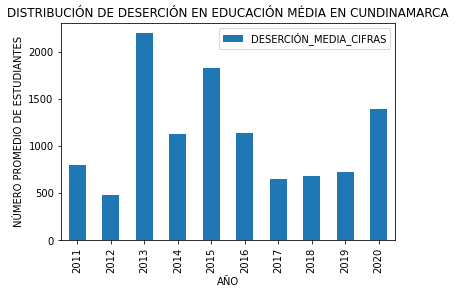

In [ ]:
histo_deser = no_nulo_consolidado_cundi.T.plot.bar(y=['DESERCIÓN_MEDIA_CIFRAS']);
histo_deser.set_xlabel('AÑO')
histo_deser.set_ylabel('NÚMERO PROMEDIO DE ESTUDIANTES')
histo_deser.set_title('DISTRIBUCIÓN DE DESERCIÓN EN EDUCACIÓN MÉDIA EN CUNDINAMARCA')


Text(0.5, 1.0, 'DISTRIBUCIÓN DE REPROBACIÓN EN EDUCACIÓN MÉDIA EN CUNDINAMARCA')

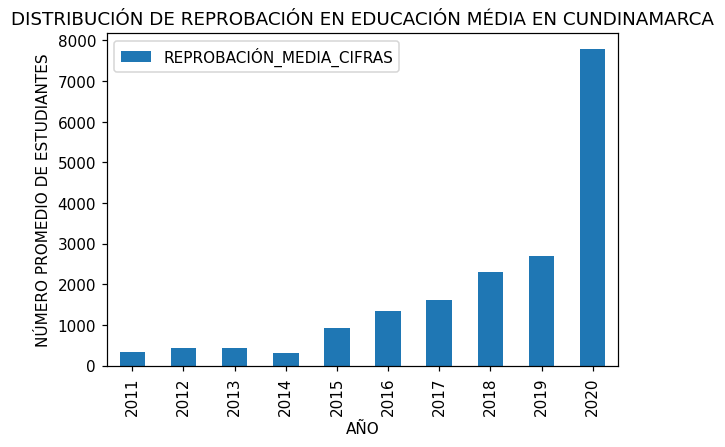

In [ ]:
histo_reproba = no_nulo_consolidado_cundi.T.plot.bar(y=['REPROBACIÓN_MEDIA_CIFRAS','DESERCIÓN_MEDIA_CIFRAS']);
histo_reproba.set_xlabel('AÑO')
histo_reproba.set_ylabel('NÚMERO PROMEDIO DE ESTUDIANTES')
histo_reproba.set_title('DISTRIBUCIÓN DE REPROBACIÓN EN EDUCACIÓN MÉDIA EN CUNDINAMARCA')

Text(0.5, 1.0, 'DISTRIBUCIÓN DE REPITENCIA EN EDUCACIÓN MÉDIA EN CUNDINAMARCA')

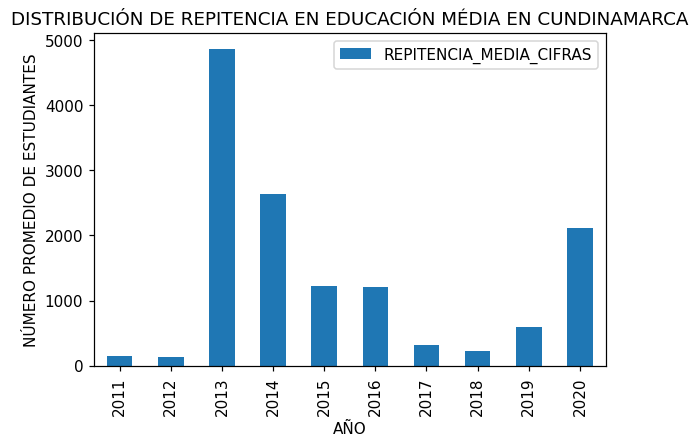

In [ ]:
histo_repi = no_nulo_consolidado_cundi.T.plot.bar(y=['REPITENCIA_MEDIA_CIFRAS']);
histo_repi.set_xlabel('AÑO')
histo_repi.set_ylabel('NÚMERO PROMEDIO DE ESTUDIANTES')
histo_repi.set_title('DISTRIBUCIÓN DE REPITENCIA EN EDUCACIÓN MÉDIA EN CUNDINAMARCA')

Text(0.5, 1.0, 'DISTRIBUCIÓN DE APROBACIÓN EN EDUCACIÓN MÉDIA EN CUNDINAMARCA')

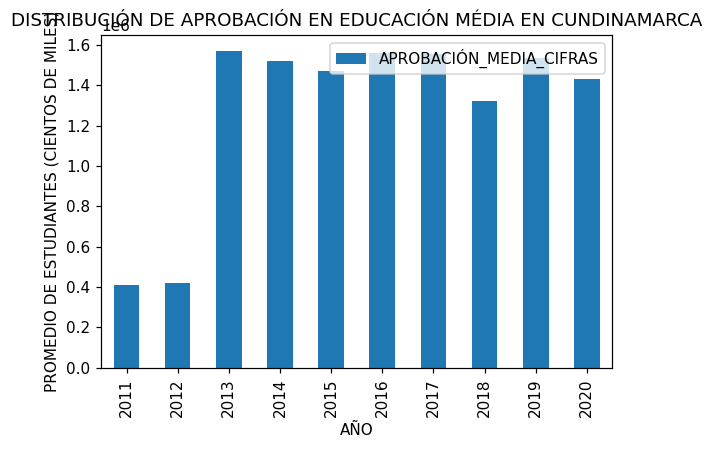

In [ ]:
histo_aproba = no_nulo_consolidado_cundi.T.plot.bar(y=['APROBACIÓN_MEDIA_CIFRAS']);
histo_aproba.set_xlabel('AÑO')
histo_aproba.set_ylabel('PROMEDIO DE ESTUDIANTES (CIENTOS DE MILES)')
histo_aproba.set_title('DISTRIBUCIÓN DE APROBACIÓN EN EDUCACIÓN MÉDIA EN CUNDINAMARCA')

Text(0.5, 1.0, 'DISTRIBUCIÓN DE CONEXION A INTERNET EN COLEGIOS DE CUNDINAMARCA')

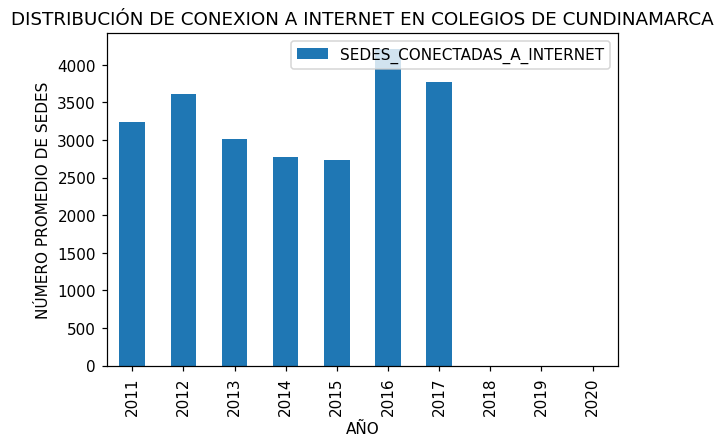

In [ ]:
histo_deser = no_nulo_consolidado_cundi.T.plot.bar(y=['SEDES_CONECTADAS_A_INTERNET']);
histo_deser.set_xlabel('AÑO')
histo_deser.set_ylabel('NÚMERO PROMEDIO DE SEDES')
histo_deser.set_title('DISTRIBUCIÓN DE CONEXION A INTERNET EN COLEGIOS DE CUNDINAMARCA')

Los últimos tres años no se realizaron registros de sedes conectadas a internet

**Mapa de calor para obtener las correlaciones entre las variables asociadas a la población determinada**

Text(0.5, 1.0, 'MAPA DE CALOR DE CORRELACIONES')

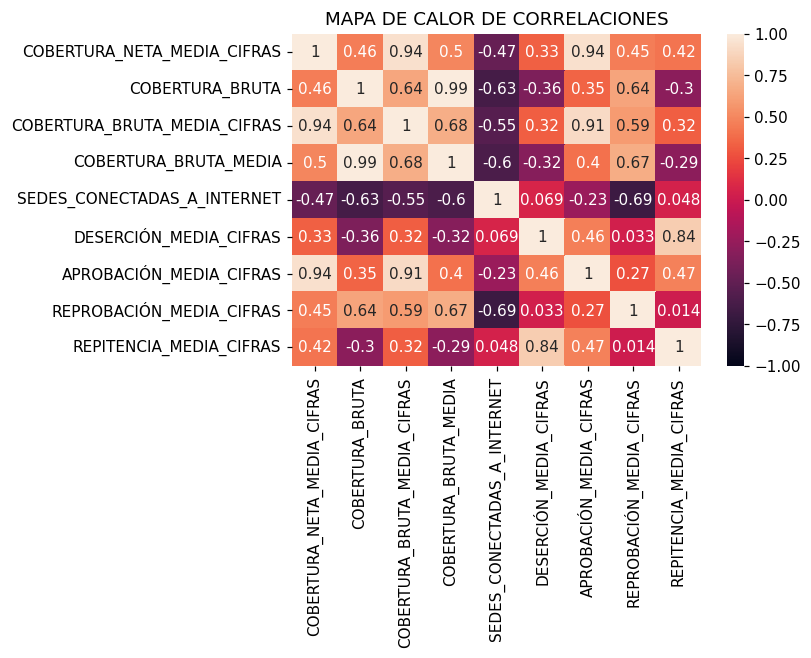

In [ ]:
#CIFRAS PARA CORRELACION
cundi_correlaciones= pd.DataFrame(no_nulo_consolidado_cundi.T.drop(['POBLACIÓN_5_16','TASA_MATRICULACIÓN_5_16', 'COBERTURA_NETA', 'DESERCIÓN_CIFRAS', 'APROBACIÓN_CIFRAS', 'REPROBACIÓN_CIFRAS', 'REPITENCIA_CIFRAS' ],axis = 1))
matrix_cundi_correlaciones = sns.heatmap(cundi_correlaciones.corr(),vmin=-1, vmax=1, annot=True);
matrix_cundi_correlaciones.set_title('MAPA DE CALOR DE CORRELACIONES')

## 4.2 Pruebas de hipótesis


De acuerdo al mapa de calor anterior destacamos las siguientes  correlaciones
 
1. REPROBACIÓN_MEDIA_CIFRAS y REPITENCIA_MEDIA_CIFRAS
2. DESERCIÓN_MEDIA_CIFRAS y REPITENCIA_MEDIA_CIFRAS
 
Obtuvimos como resultado que la segunda correlación *deserción y repitencia* es alta y significativa. Por otra parte, el índice de la primera correlación nos informa poco probable que la *reprobación y repitencia* estén relacionadas en la educación media del municipio de Cundinamarca en el periodo de años de 2011 a 2020.
 
También observamos que existe otras dos correlaciones altas que es APROBACIÓN_MEDIA_CIFRAS y COBERTURA_NETA_MEDIA_CIFRAS,
APROBACIÓN_MEDIA_CIFRAS y COBERTURA_NETA_MEDIA_CIFRAS, y para efectos de este trabajo nos dedicaremos a analizar el ítem 2.

In [ ]:

def relación_alta_significativa(var_a, var_b, min_mag = 0.5, confianza = 0.95):
  ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 2-4 líneas de código)
  
  corr, pvalor = stats.pearsonr(cundi_correlaciones[var_a], cundi_correlaciones[var_b])       # Calcule el coeficiente de correlación con su p-valor asociado.
  coef_corr = abs(corr)
  if coef_corr >= min_mag and pvalor < 1- confianza:
    es_alta_significativa = True    # Utilice los resultados obtenidos para determinar si la correlación es aceptada.
  else:
    es_alta_significativa = False

  ### FIN DEL CÓDIGO ###

  return es_alta_significativa

In [ ]:
relación_alta_significativa('DESERCIÓN_MEDIA_CIFRAS', 'REPITENCIA_MEDIA_CIFRAS')
#H_O No existe una correlación significativa entre las variables 
#H_1 Existe una correlación

True

Entonces la hipótesis nula <br>
**(H_0):** *No existe una correlación significativa entre las variables DESERCIÓN_MEDIA_CIFRAS y REPITENCIA_MEDIA_CIFRAS.*<br>
se descarta y **aceptamos** la hipótesis <br>
**(H_1):** *existe una correlación entre** DESERCIÓN_MEDIA_CIFRAS y REPITENCIA_MEDIA_CIFRAS.*<br>
A continuación modelaremos la misma.

In [ ]:
relación_alta_significativa('REPROBACIÓN_MEDIA_CIFRAS', 'REPITENCIA_MEDIA_CIFRAS')
#H_0

False

Este resultado nos comprueba los datos obtenidos en el mapa de calor.

**MODELO ESTADÍSTICO. REGRESIONES.**

In [ ]:
def correl_lineal(var_ind, var_dep):

  crecimiento, valor_inicial, correlación, p_valor, error =  stats.linregress(cundi_correlaciones[var_ind],  cundi_correlaciones[var_dep])

  return crecimiento, valor_inicial, correlación, p_valor

In [ ]:
correl_lineal('DESERCIÓN_MEDIA_CIFRAS', 'REPITENCIA_MEDIA_CIFRAS')

(2.2604797625420385,
 -1146.6268422500889,
 0.836440791514876,
 0.002557346952952524)

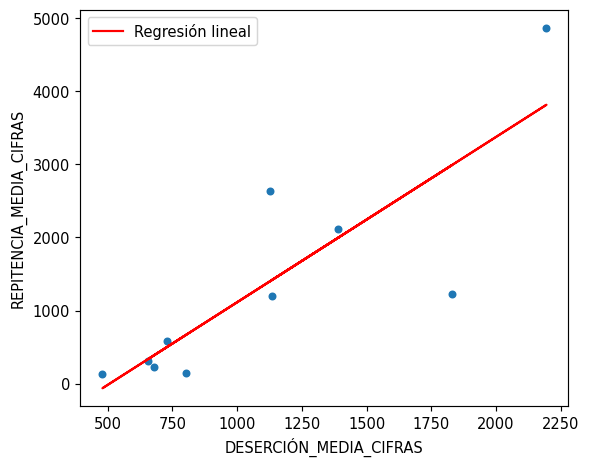

In [ ]:
m, b, r, p = correl_lineal('DESERCIÓN_MEDIA_CIFRAS', 'REPITENCIA_MEDIA_CIFRAS')
mod_lin =  m * cundi_correlaciones['DESERCIÓN_MEDIA_CIFRAS'] + b

# Gráfica de dispersión
ax = cundi_correlaciones.plot.scatter('DESERCIÓN_MEDIA_CIFRAS', 'REPITENCIA_MEDIA_CIFRAS', figsize = (6,5)) 
ax.get_figure().set_dpi(105);
ax.plot(cundi_correlaciones['DESERCIÓN_MEDIA_CIFRAS'], mod_lin, c='r', label='Regresión lineal'); 
ax.legend();

Aquí obtenemos un modelo aceptable, sin embargo vamos a hacer pruebas con un modelo tipo logístico a continuación.

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: invalid value encountered in add
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:943: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights


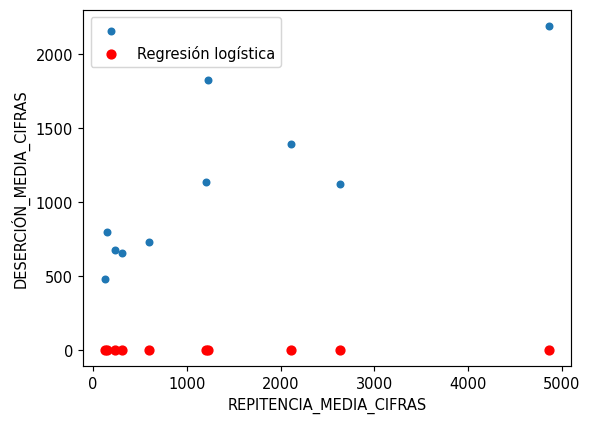

In [ ]:
model = sm.GLM.from_formula("DESERCIÓN_MEDIA_CIFRAS ~ REPITENCIA_MEDIA_CIFRAS", family=sm.families.Binomial(), data=cundi_correlaciones)
result = model.fit()
result.summary()

b0, b1 = result.params

y = pd.Series(1/(1+np.exp(-(b0+b1*cundi_correlaciones['REPITENCIA_MEDIA_CIFRAS']))))

ax = cundi_correlaciones.plot.scatter('REPITENCIA_MEDIA_CIFRAS', 'DESERCIÓN_MEDIA_CIFRAS', label = " ", figsize = (6,4.5)); # Gráfica de dispersión con la variable objetivo.
ax.get_figure().set_dpi(105)  
ax.scatter(cundi_correlaciones['REPITENCIA_MEDIA_CIFRAS'], y, color = 'red', lw = 1, label = "Regresión logística"); # Gráfica de líneas con los puntos calculados con la regresión.
ax.legend()

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: 

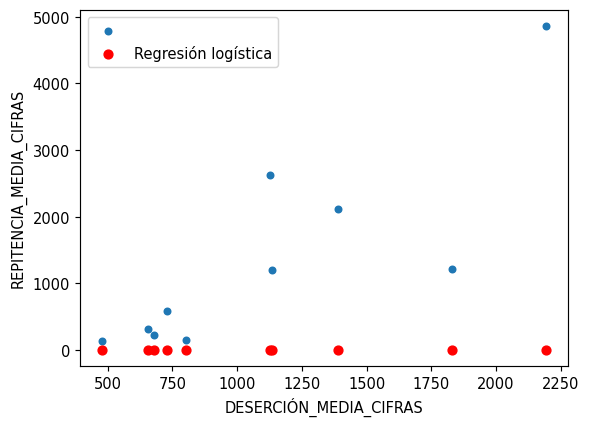

In [ ]:
model = sm.GLM.from_formula("REPITENCIA_MEDIA_CIFRAS ~ DESERCIÓN_MEDIA_CIFRAS", family=sm.families.Binomial(), data=cundi_correlaciones)
result = model.fit()
result.summary()

b0, b1 = result.params

y = pd.Series(1/(1+np.exp(-(b0+b1*cundi_correlaciones['DESERCIÓN_MEDIA_CIFRAS']))))

ax = cundi_correlaciones.plot.scatter('DESERCIÓN_MEDIA_CIFRAS', 'REPITENCIA_MEDIA_CIFRAS', label = " ", figsize = (6,4.5)); # Gráfica de dispersión con la variable objetivo.
ax.get_figure().set_dpi(105)  
ax.scatter(cundi_correlaciones['DESERCIÓN_MEDIA_CIFRAS'], y, color = 'red', lw = 1, label = "Regresión logística"); # Gráfica de líneas con los puntos calculados con la regresión.
ax.legend()

Observamos que definitivamente estos datos no se adhieren a la curva por tanto tomaremos la regresión lineal como el modelo más apropiado para esta correlación.

## 4.3. Estadística Inferencial
 
Identificar si entre los años 2011 y 2020  en los estudiantes de nivel media vocacional existieron estadísticas significativas con respecto a las variables de APROBACIÓN, REPITENCIA, DESERCIÓN, REPROBACIÓN.
 
Para esto debemos recordar que el Dataframe `df` nos proveía con datos promedios en cada una de sus variables y posteriormente transformamos estos porcentajes promedios en cifras en el data frame `df_cifras` luego ya estamos trabajando con datos promedio, así el data frame para realizar la prueba de hipótesis de medias es:


In [ ]:
cundi_correlaciones.loc[['2011', '2020']]

,COBERTURA_NETA_MEDIA_CIFRAS,COBERTURA_BRUTA,COBERTURA_BRUTA_MEDIA_CIFRAS,COBERTURA_BRUTA_MEDIA,SEDES_CONECTADAS_A_INTERNET,DESERCIÓN_MEDIA_CIFRAS,APROBACIÓN_MEDIA_CIFRAS,REPROBACIÓN_MEDIA_CIFRAS,REPITENCIA_MEDIA_CIFRAS
2011,214826.0,8003.60,435632.0,6656.50,3235.11,802.0,410371.0,341.0,148.0
2020,917738.0,12136.99,1725227.0,10779.59,0.00,1391.0,1433445.0,7785.0,2113.0


In [ ]:

año_2011 = cundi_correlaciones.loc[['2011']]
año_2020 = cundi_correlaciones.loc[['2020']]

#stat, pvalor = stats.ttest_ind(año_2011, año_2020)
stat, pvalor = sm.stats.ztest(año_2011, año_2020,         # Las dos muestras
                               value=0,                # La dif=0 es la hipótesis nula
                               alternative='two-sided' # dos colas
                                 )   # Ejecute la prueba estadística más apropiada. 


conclusion = pvalor < 0.25        # Utilice el resultado de la prueba para determinar si la diferencia es significativa o no (conclusión).
### FIN DEL CÓDIGO ###
conclusion, pvalor

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/weightstats.py:1370: RuntimeWarning: invalid value encountered in true_divide
  var_pooled /= (nobs1 + nobs2 - 2 * ddof)


(array([False, False, False, False, False, False, False, False, False]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan]))

Observamos que no existieron cambios significativos, sin embargo no es imposible determinar el p-valor, en esta parte nuestras hipótesis son inconclusas, para la población analizada. Obtuvimos los mismos resultados para las comparaciones entre los años 2019 y 2020, al igual que entre 2011 y 2019.

# 5. **Visualizaciones Interactivas**

In [ ]:
CORRO=df_cifras.loc[df_cifras['AÑO'] == 2011]
CORRO_2=df_cifras.loc[df_cifras['AÑO'] == 2020]
#DataFrame para ver reprobación en 2011 en COlombia
REPRO_2011= CORRO.groupby('CÓDIGO_DEPARTAMENTO').agg({'REPITENCIA_MEDIA' : np.mean}) 
REPRO_2011['COD_DEPART']=sorted(CORRO['CÓDIGO_DEPARTAMENTO'].unique())
#DataFrame para ver reprobación en 2020 en COlombia
REPRO_2020= CORRO_2.groupby('CÓDIGO_DEPARTAMENTO').agg({'REPITENCIA_MEDIA' : np.mean}) 
REPRO_2020['COD_DEPART']=sorted(CORRO_2['CÓDIGO_DEPARTAMENTO'].unique())
REPRO_2020

,REPITENCIA_MEDIA,COD_DEPART
CÓDIGO_DEPARTAMENTO,,
5,2.850560,5
8,3.238696,8
11,2.270000,11
13,2.521957,13
15,3.567154,15
17,2.057778,17
18,1.971875,18
19,3.269048,19
20,3.351600,20


In [ ]:
#esta función es para arreglar los codigos de departamento para luego poder unirlos con la tabla de los poligonos
def indices(CORROMA):
   for i in range (1,100):
     if i<10:
       CORROMA.loc[i, 'COD_DEPART'] = f'0{i}'
     else:
      CORROMA.loc[i, 'COD_DEPART'] = f'{i}'
   return CORROMA   
#aplicando la función al dataframe de 2011 Colombia   
REPRO_2011=indices(REPRO_2011) 
#aplicando la función al dataframe de 2020 Colombia  
REPRO_2020=indices(REPRO_2020) 

In [ ]:
!pip install -U plotly        # Instalamos Plotly (trabajaremos con la versión más reciente).
!pip install -U geopandas 

In [ ]:
!unzip colombia.zip

Archive:  colombia.zip
  inflating: divipola_dpto_index.hdf  
  inflating: divipola_mun_index.hdf  
  inflating: shapes/Cabecera Municipal.dbf  
  inflating: shapes/Cabecera Municipal.prj  
  inflating: shapes/Cabecera Municipal.sbn  
  inflating: shapes/Cabecera Municipal.sbx  
  inflating: shapes/Cabecera Municipal.shp  
  inflating: shapes/Cabecera Municipal.shp.xml  
  inflating: shapes/Cabecera Municipal.shx  
  inflating: shapes/desktop.ini      
  inflating: shapes/Fuera colombia.dbf  
  inflating: shapes/Fuera colombia.prj  
  inflating: shapes/Fuera colombia.sbn  
  inflating: shapes/Fuera colombia.sbx  
  inflating: shapes/Fuera colombia.shp  
  inflating: shapes/Fuera colombia.shx  
  inflating: shapes/Limite Departamental.dbf  
  inflating: shapes/Limite Departamental.prj  
  inflating: shapes/Limite Departamental.sbn  
  inflating: shapes/Limite Departamental.sbx  
  inflating: shapes/Limite Departamental.shp  
  inflating: shapes/Limite Departamental.shp.xml  
  inflating

In [ ]:
col_deps = gpd.read_file(r"shapes/Limite Departamental.shp") 

In [ ]:
col_deps['geometry'] = col_deps['geometry'].simplify(1e-2)
col_deps.head(5)

,COD_DEPART,COUNT,Nombre,geometry
0,05,125,ANTIOQUIA,"POLYGON ((-74.88001 5.74658, -74.99279 5.71491..."
1,08,23,ATLANTICO,"POLYGON ((-74.72511 10.77173, -74.72330 10.668..."
2,11,1,"BOGOTA, D.C.","POLYGON ((-74.00669 4.82357, -73.99905 4.80378..."
3,13,46,BOLIVAR,"POLYGON ((-73.81547 7.69167, -73.79711 7.65132..."
4,15,123,BOYACA,"POLYGON ((-72.74243 6.56634, -72.70467 6.54096..."


In [ ]:
##union codigos 2011
col_deps_2011=col_deps.merge(REPRO_2011, on="COD_DEPART", how="left")
##union codigos 2011
col_deps_2020=col_deps.merge(REPRO_2020, on="COD_DEPART", how="left")

In [ ]:
col_deps_2020.head(10)

,COD_DEPART,COUNT,Nombre,geometry,REPITENCIA_MEDIA
0,05,125,ANTIOQUIA,"POLYGON ((-74.88001 5.74658, -74.99279 5.71491...",2.850560
1,08,23,ATLANTICO,"POLYGON ((-74.72511 10.77173, -74.72330 10.668...",3.238696
2,11,1,"BOGOTA, D.C.","POLYGON ((-74.00669 4.82357, -73.99905 4.80378...",2.270000
3,13,46,BOLIVAR,"POLYGON ((-73.81547 7.69167, -73.79711 7.65132...",2.521957
4,15,123,BOYACA,"POLYGON ((-72.74243 6.56634, -72.70467 6.54096...",3.567154
5,17,27,CALDAS,"POLYGON ((-75.71407 5.54761, -75.68591 5.52505...",2.057778
6,18,16,CAQUETA,"POLYGON ((-75.80890 0.89557, -75.82903 0.87484...",1.971875
7,19,42,CAUCA,"POLYGON ((-76.31618 1.68438, -76.24163 1.68197...",3.269048
8,20,25,CESAR,"POLYGON ((-73.79151 10.39283, -73.74075 10.435...",3.351600
9,23,30,CORDOBA,"POLYGON ((-75.70427 9.37331, -75.68761 9.35678...",2.624333


In [ ]:
col_json_1 = json.loads(col_deps_2011.to_json())
col_json_2 = json.loads(col_deps_2020.to_json())

In [ ]:
print(col_json_1['features'][0])

{'id': '0', 'type': 'Feature', 'properties': {'COD_DEPART': '05', 'COUNT': 125, 'Nombre': 'ANTIOQUIA', 'REPITENCIA_MEDIA': 1.0505494505494506}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-74.8800113808204, 5.746575611275603], [-74.99279268223637, 5.714906566385082], [-75.0089231086144, 5.681758741073224], [-75.093648226884, 5.655588804080198], [-75.09210778714453, 5.584338173168305], [-75.1283886930836, 5.5550472379398474], [-75.13722196192384, 5.527359633840208], [-75.21976911465276, 5.50349470241872], [-75.27529891361382, 5.4188531644421705], [-75.28147486207507, 5.47649960057629], [-75.31610946727795, 5.462208122307175], [-75.31025299128237, 5.507539861075887], [-75.3280223502511, 5.525190157000285], [-75.3399279199374, 5.602776660114955], [-75.3673468920453, 5.602759780739463], [-75.38375370436978, 5.622609134903827], [-75.36879875755648, 5.640496748426358], [-75.37631231176363, 5.67470583400717], [-75.4293093203687, 5.696511261285822], [-75.4790270473602, 5.664515641983428]

In [ ]:
col = px.choropleth(col_deps_2011,                           # El GeoDataFrame/DataFrame donde están los datos
                    geojson = col_json_1,                 # GeoJSON obtenido a partir de la geometría del GeoDataFrame.
                    color="REPITENCIA_MEDIA",                      # Nombre de la columna del dataframe que queremos representar en el mapa coroplético
                    locations="Nombre",                 # Nombre de la columna del dataframe que coincide con las localizaciones
                    featureidkey="properties.Nombre",   # Llave dentro del GeoJSON usada como referencia.  
                    color_continuous_scale  = "Agsunset",
                    projection="mercator",
                    labels={'REPITENCIA_MEDIA':'Tasa de Repitencia <br> en Media'} # Como queremos que aparezca la información
)
col.update_geos(fitbounds="locations", visible=False) # Para que aparezca centrado donde están los datos (en Colombia)
col.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#col.set_title('Mapa Corroplético Reprobación Colombia 2011')
col.show()

In [ ]:
col_2 = px.choropleth(col_deps_2020,                           # El GeoDataFrame/DataFrame donde están los datos
                    geojson = col_json_2,                 # GeoJSON obtenido a partir de la geometría del GeoDataFrame.
                    color="REPITENCIA_MEDIA",                      # Nombre de la columna del dataframe que queremos representar en el mapa coroplético
                    locations="Nombre",                 # Nombre de la columna del dataframe que coincide con las localizaciones
                    featureidkey="properties.Nombre",   # Llave dentro del GeoJSON usada como referencia.  
                    color_continuous_scale  = "Agsunset",
                    projection="mercator",
                    labels={'REPITENCIA_MEDIA':'Tasa de Repitencia <br> en Media'} # Como queremos que aparezca la información
)
col_2.update_geos(fitbounds="locations", visible=False) # Para que aparezca centrado donde están los datos (en Colombia)
col_2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#col.set_title('Mapa Corroplético Reprobación Colombia 2011')
col_2.show()

# 6. **Conclusiones**
------


1. Se deben realizar programas para reforzar el acompañamiento a los estudiantes en la etapa media en el departamento de Cundinamarca con el fin de reducir la reprobación en estos grados que lleva directamente a la deserción escolar dada la relación observada en este proyecto.

2. El año 2020 fue crítico para la educación en toda Colombia, ya que observando la distribución de deserción escolar para este periodo es casi  tres veces más que en el 2011. Ahora, la deserción en el año de la pandemia duplica la cifra con respecto al 2019.
